# House Price Prediction

## 1. Environment Setup

In [1]:
# To get multiple outputs in the same cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Set the required global options

# To display all the columns in dataframe
pd.set_option( "display.max_columns", None)
pd.set_option( "display.max_rows", None)

## 2. Reading the Input data (csv) file

In [5]:
 house = pd.read_csv('./train.csv')

In [6]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3. Data Analysis & Cleaning

In [7]:
# Checking rows and columns - shape 
house.shape

(1460, 81)

In [8]:
# Getting the overview of Data types and Non-Null info
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Handling Missing Values

In [9]:
# Checking for any Null columns
house.isnull().sum().any()

house.shape[0]

# Finding the columns with more than 40% NULLs.
ser = house.isnull().sum()/len(house)*100
null_drps = ser[ser > 40]
null_drps

True

1460

Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [10]:
# Dropping variables with more than 95% NULLs.
# Here, out of these 5, four of them has more than 80% NULLs.

house.drop(null_drps.index, axis='columns', inplace=True)

# Verifying, whether variables are successfully dropped
ser = house.isnull().sum()/len(house)*100
nulls = ser[ser > 0]
nulls

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [11]:
# Checking the info of the remaining columns with NULLs
house[nulls.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


#### Imputation of Numerical variables

In [12]:
# Imputing Numerical variables
num_var = ['LotFrontage','MasVnrArea','GarageYrBlt']
house[num_var].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


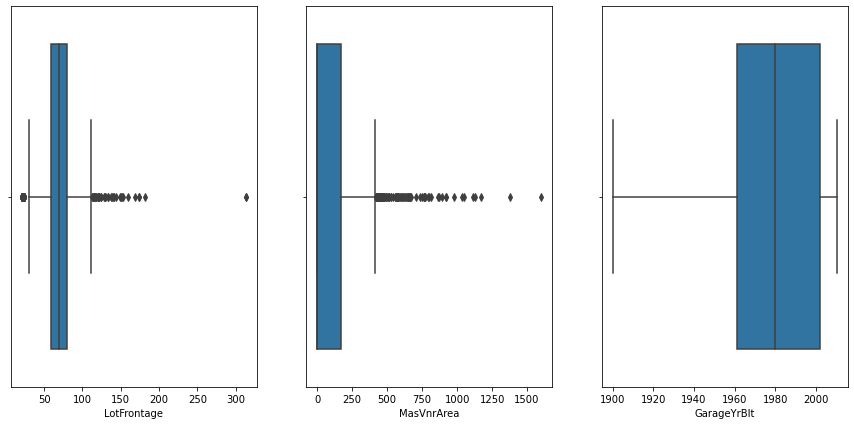

In [13]:
# Plotting boxplot to understand outliers
plt.figure(figsize=(15,7))
for i,j in enumerate(num_var):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=house, x=j)
plt.show();

In [14]:
# There are outliers in LotFrontage and MasVnrArea.
# I would impute these with median as mean is eaffected by outliers
house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].median())
house['MasVnrArea'] = house['MasVnrArea'].fillna(house['MasVnrArea'].median())

# There are no outliers in GarageYrBlt. So, I would impute this with mean
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(house['GarageYrBlt'].mean())

#### Imputation of Categorical variables

In [15]:
# Checking the count of each category
house['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [16]:
# Replacing it with it's mode i.e. None
house['MasVnrType'] = house['MasVnrType'].replace(np.nan, house["MasVnrType"].mode()[0])

In [17]:
# Checking the count of each category
house['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [18]:
# Replacing NaN values to NA which indicates that the property doesnt have a basement.
house['BsmtQual'].fillna(house["MasVnrType"].mode()[0], inplace=True)

In [19]:
# Checking the count of each category
house['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [20]:
# Replacing NaN values to NA which indicates that the property doesnt have a basement.
# house['BsmtCond'] = house['BsmtCond'].replace(np.nan, 'NA')
house['BsmtCond'].fillna(house["BsmtCond"].mode()[0], inplace=True)

In [21]:
# Checking the count of each category
house['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [22]:
# Replacing NaN values to NA which indicates that the property doesnt have a basement.
# house['BsmtExposure'] = house['BsmtExposure'].replace(np.nan, 'NA')
house['BsmtExposure'].fillna(house["BsmtExposure"].mode()[0], inplace=True)

In [23]:
# Checking the count of each category
house['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [24]:
# Replacing NaN values to NA which indicates that the property doesnt have a basement.
# house['BsmtFinType1'] = house['BsmtFinType1'].replace(np.nan, 'NA')
house['BsmtFinType1'].fillna(house["BsmtFinType1"].mode()[0], inplace=True)

In [25]:
# Checking the count of each category
house['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [26]:
# Replacing NaN values to NA which indicates that the property doesnt have a basement.
# house['BsmtFinType2'] = house['BsmtFinType2'].replace(np.nan, 'NA')
house['BsmtFinType2'].fillna(house["BsmtFinType2"].mode()[0], inplace=True)

In [27]:
# Checking the count of each category
house['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [28]:
# Replacing it with it's mode i.e. SBrkr
# house['Electrical'] = house['Electrical'].replace(np.nan, 'NA')
house['Electrical'].fillna(house["Electrical"].mode()[0], inplace=True)

In [29]:
# Checking the count of each category
house['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [30]:
# Replacing NaN values to NA which indicates that the property doesnt have a Garage.
# house['GarageType'] = house['GarageType'].replace(np.nan, 'NA')
house['GarageType'].fillna(house["GarageType"].mode()[0], inplace=True)

In [31]:
# Checking the count of each category
house['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [32]:
# Replacing NaN values to NA which indicates that the property doesnt have a Garage.
# house['GarageFinish'] = house['GarageFinish'].replace(np.nan, 'NA')
house['GarageFinish'].fillna(house["GarageFinish"].mode()[0], inplace=True)

In [33]:
# Checking the count of each category
house['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [34]:
# Replacing NaN values to NA which indicates that the property doesnt have a Garage.
# house['GarageQual'] = house['GarageQual'].replace(np.nan, 'NA')
house['GarageQual'].fillna(house["GarageQual"].mode()[0], inplace=True)

In [35]:
# Checking the count of each category
house['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [36]:
# Replacing NaN values to NA which indicates that the property doesnt have a Garage.
# house['GarageCond'] = house['GarageCond'].replace(np.nan, 'NA')
house['GarageCond'].fillna(house["GarageCond"].mode()[0], inplace=True)

In [37]:
# Checking for any Null columns
house.isnull().sum().any()

False

In [38]:
# Dropping variable 'Id' as it has a monotonic increasing value, which would not add any value
house.drop(columns='Id', inplace=True)

### Deriving features from date

In [39]:
# import datetime as dt
# present_yr = int(dt.datetime.now().year())

In [40]:
# Deriving Original Age of the house at Point of Sale 
house['HouseOrigAgeAtPOS'] = house['YrSold'] - house['YearBuilt']

In [41]:
house['HouseReModAgeAtPOS'] = house['YrSold'] - house['YearRemodAdd']

In [42]:
house['GarageAgeAtPOS'] = house['YrSold'] - house['GarageYrBlt']

In [43]:
# Deriving a feature to store 1, if house is remodelled, otherwise 0
house['IsReMod'] = np.where(house['YearBuilt'] == house['YearRemodAdd'], 0,1)

In [44]:
house[['YearBuilt','YearRemodAdd','YrSold','HouseOrigAgeAtPOS','HouseReModAgeAtPOS','IsReMod','GarageAgeAtPOS','SalePrice']].head()

,YearBuilt,YearRemodAdd,YrSold,HouseOrigAgeAtPOS,HouseReModAgeAtPOS,IsReMod,GarageAgeAtPOS,SalePrice
0,2003,2003,2008,5,5,0,5.0,208500
1,1976,1976,2007,31,31,0,31.0,181500
2,2001,2002,2008,7,6,1,7.0,223500
3,1915,1970,2006,91,36,1,8.0,140000
4,2000,2000,2008,8,8,0,8.0,250000


In [45]:
# Now, since the features are derived from the date variables, we can drop them.
house.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],inplace=True)

In [46]:
# Dropping MoSold, SaleType and SaleCondition - 
# These variables won't be available at the time of new Sale n hence cannot be considered for Price Prediction

# house.drop(columns=['MoSold','SaleType','SaleCondition'],inplace=True)

house.drop(columns=['MoSold'],inplace=True)

In [47]:
# MSSubClass, OverallQual and OverallCond store num values but are categorical informations.
# Thus, converting them to categories.

to_cat_vars = ['MSSubClass','OverallQual','OverallCond']
for i in to_cat_vars:
    house[i] = house[i].astype(object)
    
# Verifying the type conversion
house[to_cat_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSSubClass   1460 non-null   object
 1   OverallQual  1460 non-null   object
 2   OverallCond  1460 non-null   object
dtypes: object(3)
memory usage: 34.3+ KB


### Data Exploration

In [48]:
# house.describe()

In [49]:
# house.sample(5)

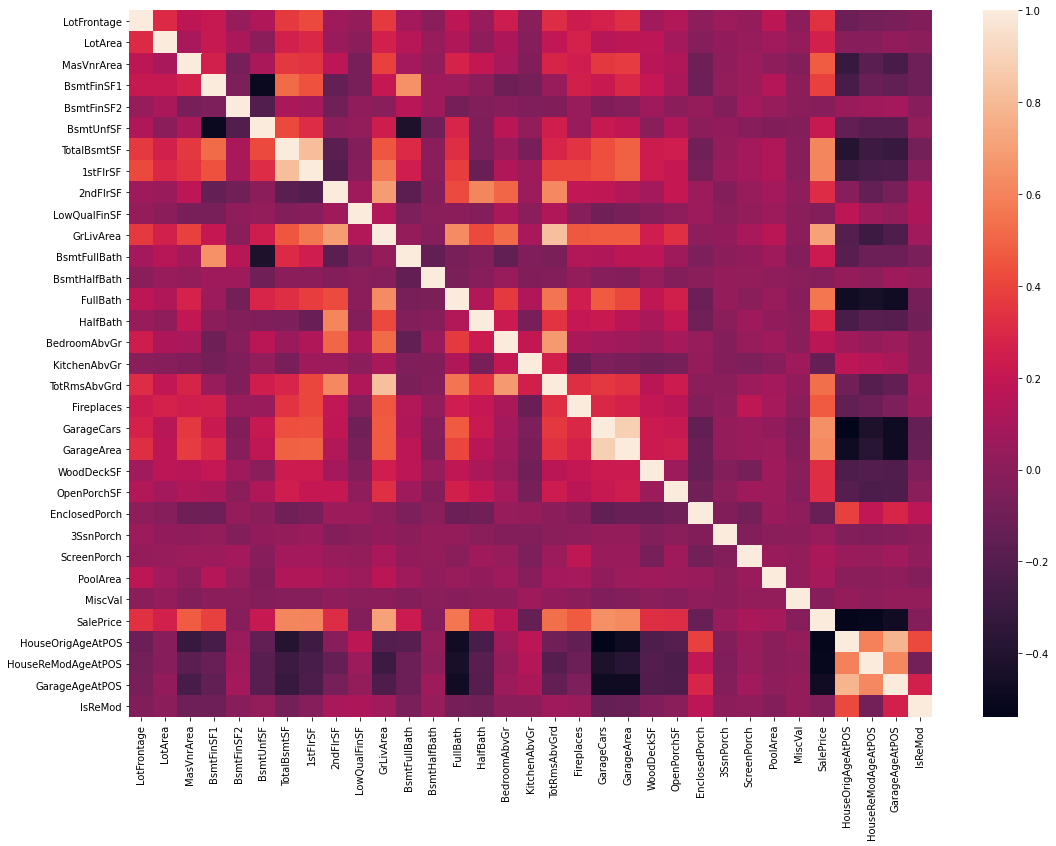

In [50]:
plt.figure(figsize=(18,13));
sns.heatmap(house.corr(), annot = False);

- Early findings from the heatmap suggests that Sale Price of house is faily correlated with 
    - HouseOrigAgeAtPOS
    - HouseReModAgeAtPOS
    - MasVnrArea
    - TotalBsmtSF
    - 1stFlrSF
    - GrLivArea 
    - FullBath
    - Fireplaces
    - GarageYrBlt
    - GarageCars
    - GarageArea
    
_All these are out of the Numerical Features._

In [51]:
# Re-Inferring the results from the heatmap using the Correlation table

hc = house.corr()
SP = hc['SalePrice']

# checking for Important variables (iv) - with pearson value > abs(0.3)
iv = hc.loc[ (abs(hc['SalePrice']) > abs(0.3)) & (hc.index != 'SalePrice'),'SalePrice'].sort_values(ascending=False)
iv

GrLivArea             0.708624
GarageCars            0.640409
GarageArea            0.623431
TotalBsmtSF           0.613581
1stFlrSF              0.605852
FullBath              0.560664
TotRmsAbvGrd          0.533723
MasVnrArea            0.472614
Fireplaces            0.466929
BsmtFinSF1            0.386420
LotFrontage           0.334771
WoodDeckSF            0.324413
2ndFlrSF              0.319334
OpenPorchSF           0.315856
GarageAgeAtPOS       -0.471032
HouseReModAgeAtPOS   -0.509079
HouseOrigAgeAtPOS    -0.523350
Name: SalePrice, dtype: float64

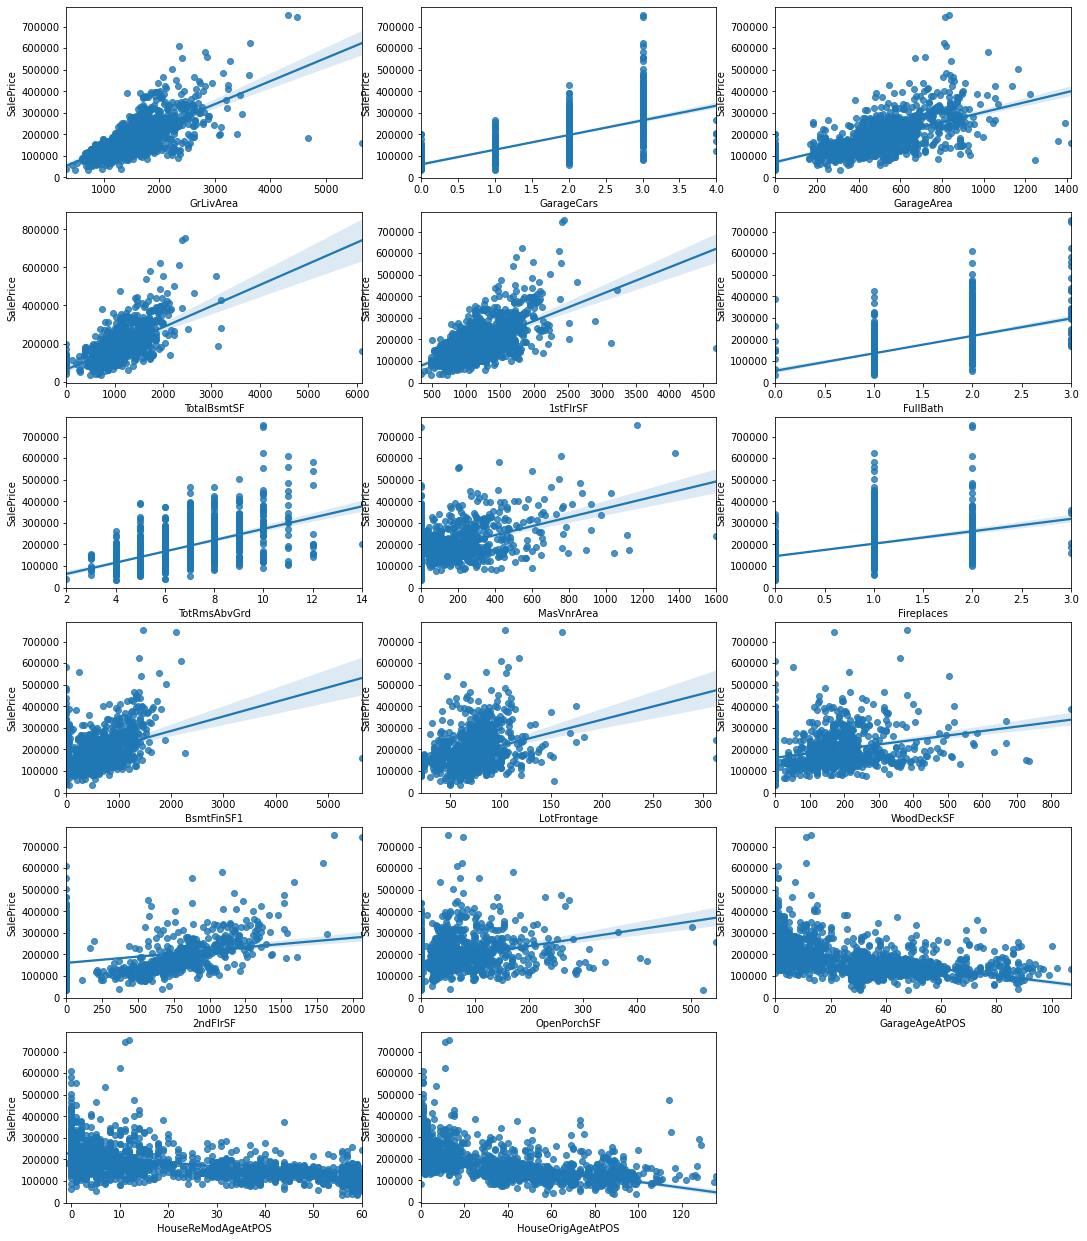

In [52]:
import math

l = len(iv.index)
b = 3
a = math.ceil(l/b)
c = 1
plt.figure(figsize=(18,22))

for i in iv.index:
    plt.subplot(a,b,c);
    sns.regplot(data=house, x= i, y= 'SalePrice');
    c += 1

plt.show();

- **Inference**
    - _Most of the variables are continuous except few like GarageCars, TotRmsAbvGrd, FullBath, FirePlaces._
    - _The **continuous variables (Independent Variables)** in the above plots are **fairly Linearly related** with the **Target Variable, SalePrice**._
    - Hence, we can safely **perform LINEAR REGRESSION.**

In [53]:
# Less Important variables (liv) - Derived from the corr() table
liv = hc.loc[ (abs(hc['SalePrice']) <= abs(0.3)) & (hc.index != 'SalePrice'),'SalePrice'].sort_values(ascending=False)
liv

HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
IsReMod         -0.021933
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

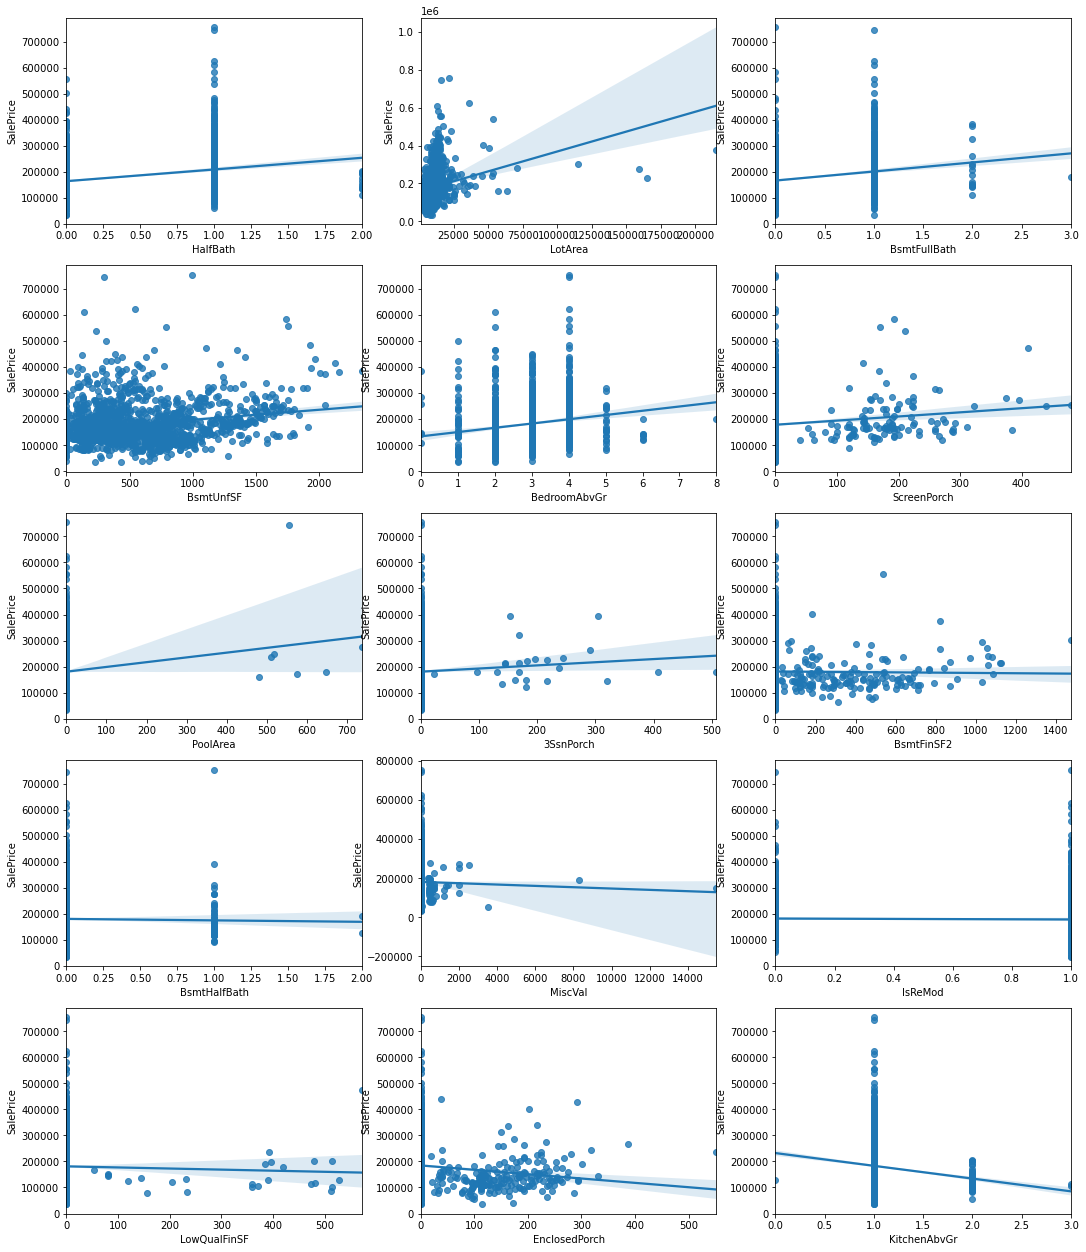

In [54]:
l = len(liv.index)
b = 3
a = math.ceil(l/b)
c = 1
plt.figure(figsize=(18,22))

for i in liv.index:
    plt.subplot(a,b,c)
    sns.regplot(data=house, x= i, y= 'SalePrice')
    c += 1

plt.show();

- **Inference**
    - _Most of the variables are **actually Categorical**._
    - _The **continuous variables (Independent Variables)** in the above plots have **poor Linear relation** with the **Target Variable, SalePrice**._
    - _Hence, we can safely **drop the continuous variables from the above plot.**_
    - _I would further analyze the actually categorical variables like **Number of Bathrooms, Bedrooms or Kitchen.**_

In [55]:
# Dropping the poorly related continuous independent variables

house.drop(columns=['LotArea','BsmtUnfSF','ScreenPorch','PoolArea','3SsnPorch','BsmtFinSF2','MiscVal','LowQualFinSF','EnclosedPorch'], inplace=True)

In [56]:
lst = ['HalfBath','BsmtFullBath','BedroomAbvGr','BsmtHalfBath','IsReMod','KitchenAbvGr']
for i in lst:
    house[i].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

0    764
1    696
Name: IsReMod, dtype: int64

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

- **Inference**
    - 'BsmtHalfBath','IsReMod','KitchenAbvGr' seems to be skewed.
    - To anlyze more, converting to category

In [57]:
house[lst] = house[lst].astype(object)
house[lst].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HalfBath      1460 non-null   object
 1   BsmtFullBath  1460 non-null   object
 2   BedroomAbvGr  1460 non-null   object
 3   BsmtHalfBath  1460 non-null   object
 4   IsReMod       1460 non-null   object
 5   KitchenAbvGr  1460 non-null   object
dtypes: object(6)
memory usage: 68.6+ KB


In [58]:
iv_lst = ['FullBath','TotRmsAbvGrd','Fireplaces','GarageCars']
house[iv_lst] = house[iv_lst].astype(object)
house[iv_lst].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FullBath      1460 non-null   object
 1   TotRmsAbvGrd  1460 non-null   object
 2   Fireplaces    1460 non-null   object
 3   GarageCars    1460 non-null   object
dtypes: object(4)
memory usage: 45.8+ KB


### Analysing the categorical variables

In [59]:
# Selecting only the variables having categorical values
house_cat = house.select_dtypes(exclude='number')
house_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,IsReMod
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,TA,TA,Y,WD,Normal,0
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,TA,TA,Y,WD,Normal,0
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,TA,TA,Y,WD,Normal,1
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,TA,TA,Y,WD,Abnorml,1
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,TA,TA,Y,WD,Normal,0


In [60]:

## Show labels in bar plots - copied from https://stackoverflow.com/a/48372659
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [61]:
# This user-defined function plots the distribution of target column, and its boxplot against loan_status column
def plot_distribution(var):
    plt.figure(figsize=(18,11))
    plt.subplot(1, 3, 1)
    ser = (house[var].value_counts(normalize=True)*100)
    ax = ser.plot.bar(color=sns.color_palette("pastel", 10))
    showLabels(ax);
    plt.subplot(1, 3, 2)
    ser = house[var].value_counts()
    ax = ser.plot.bar(color=sns.color_palette("pastel", 10))
    showLabels(ax);
    #ax = sns.histplot(data=house, x=var, kde=False)
    plt.subplot(1, 3, 3)
    ax = sns.boxplot(x=var, y= 'SalePrice', data=house, order = ser.index,  palette="pastel")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
#     ax.set_xticks(rotation=60)
    plt.show()

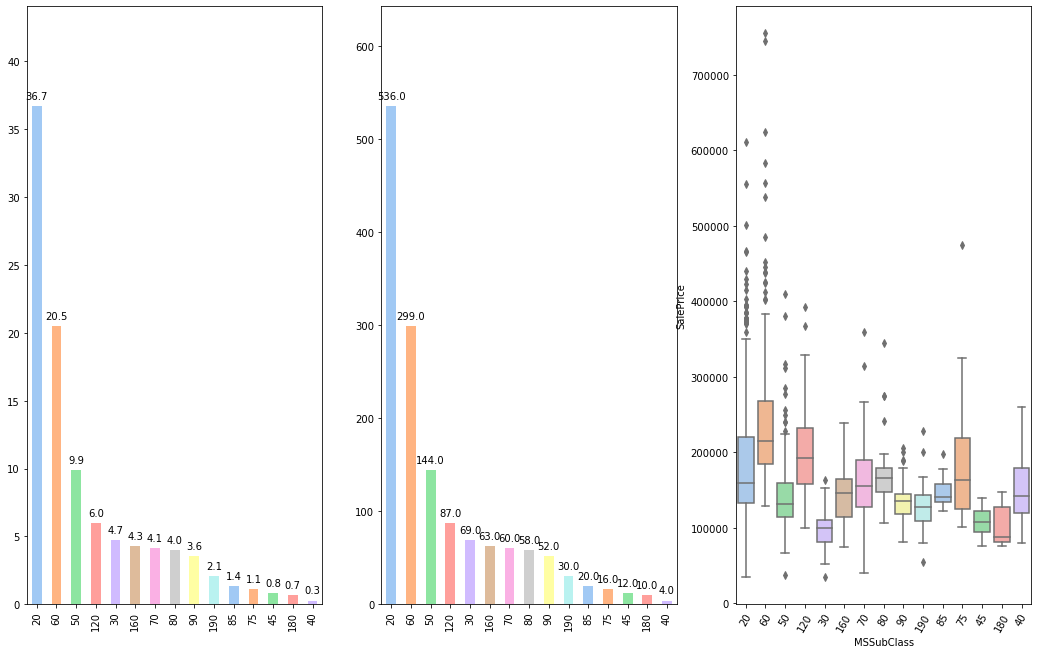

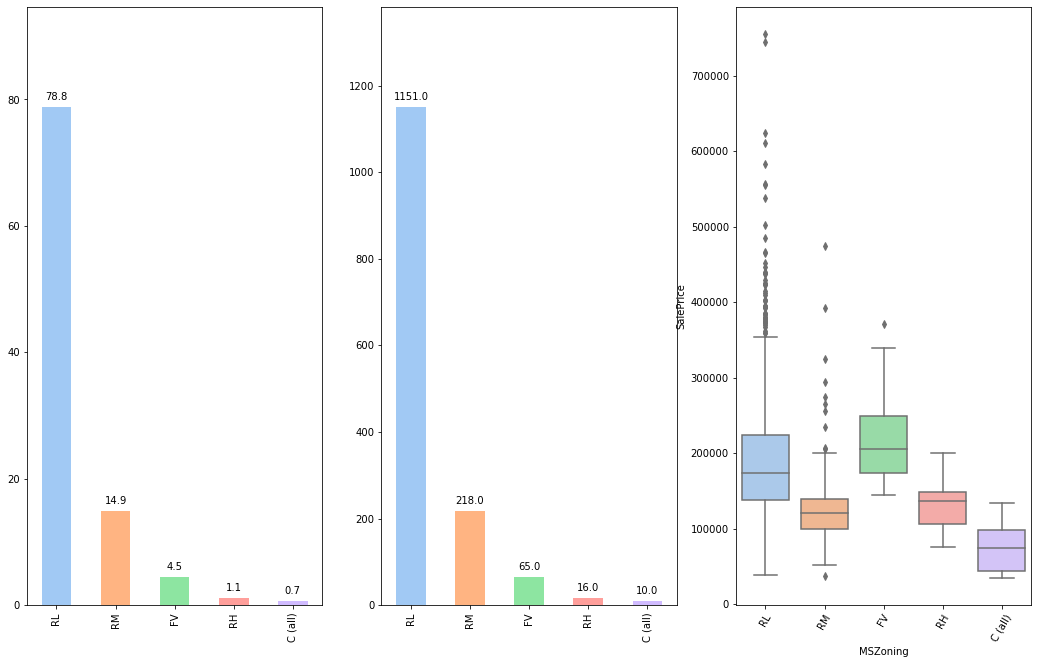

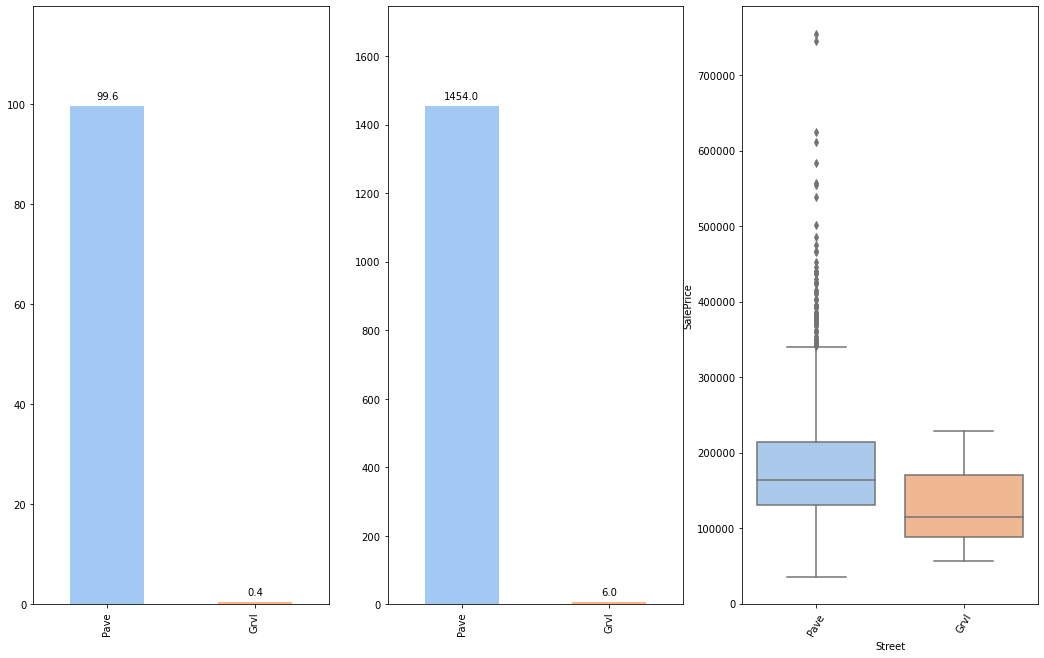

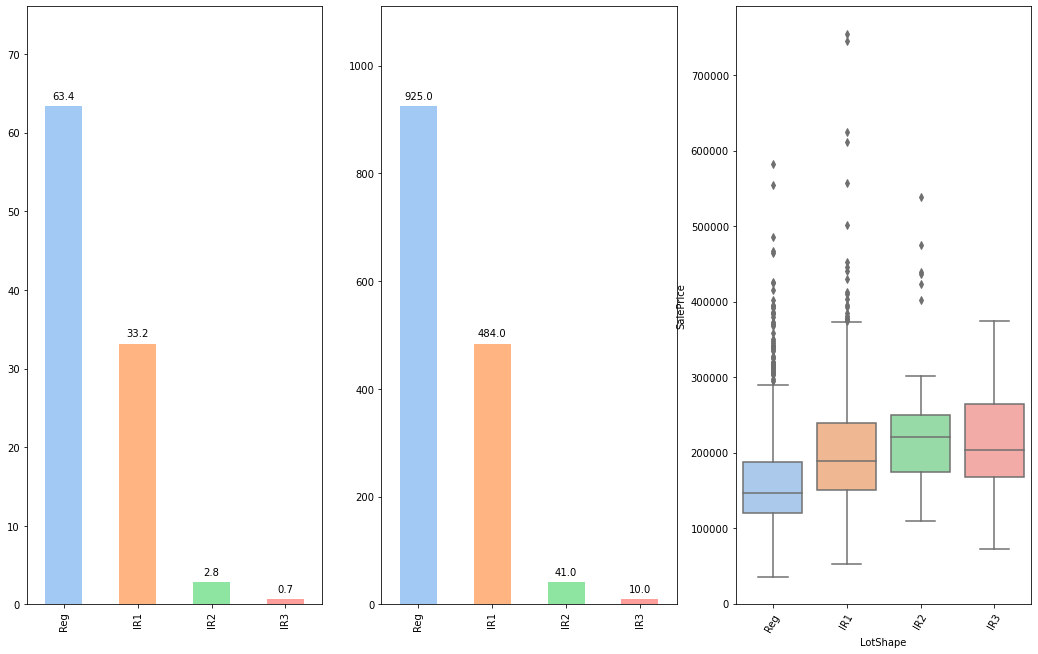

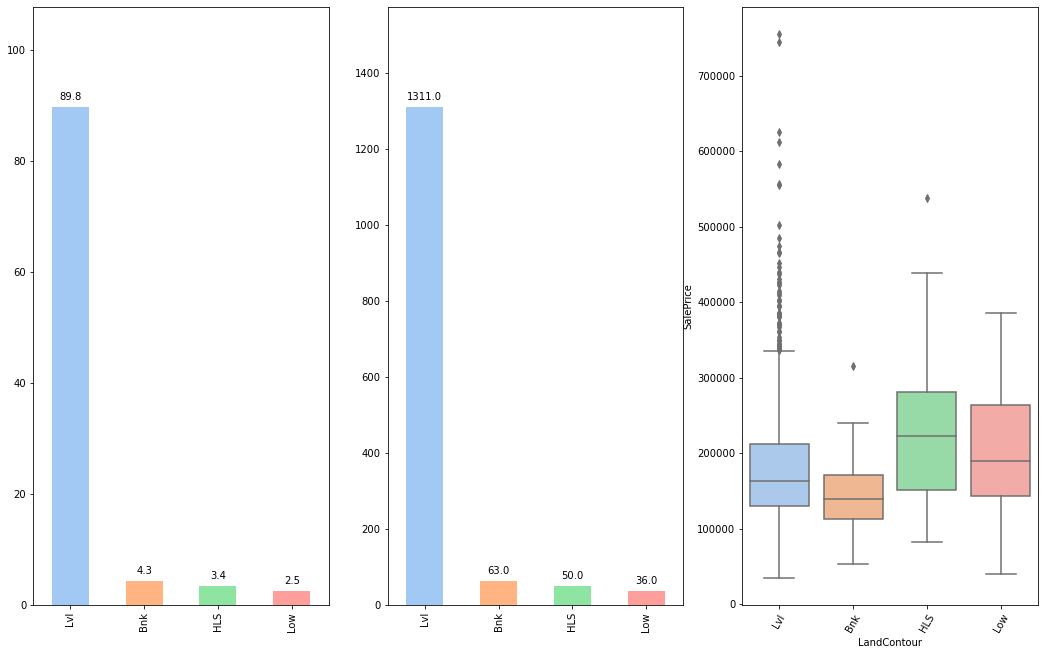

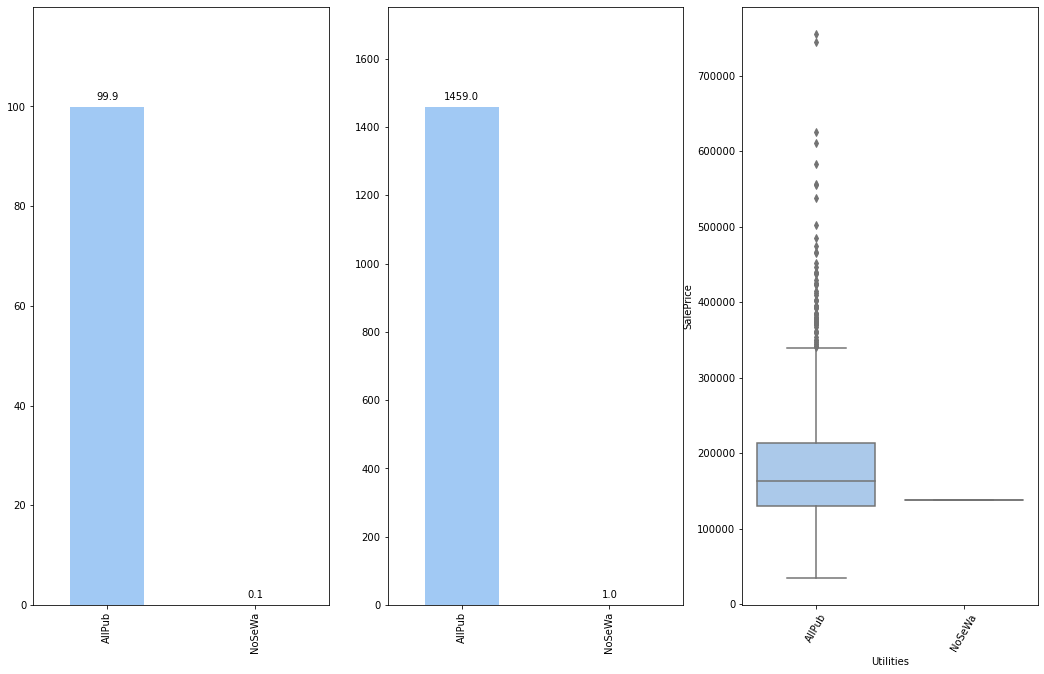

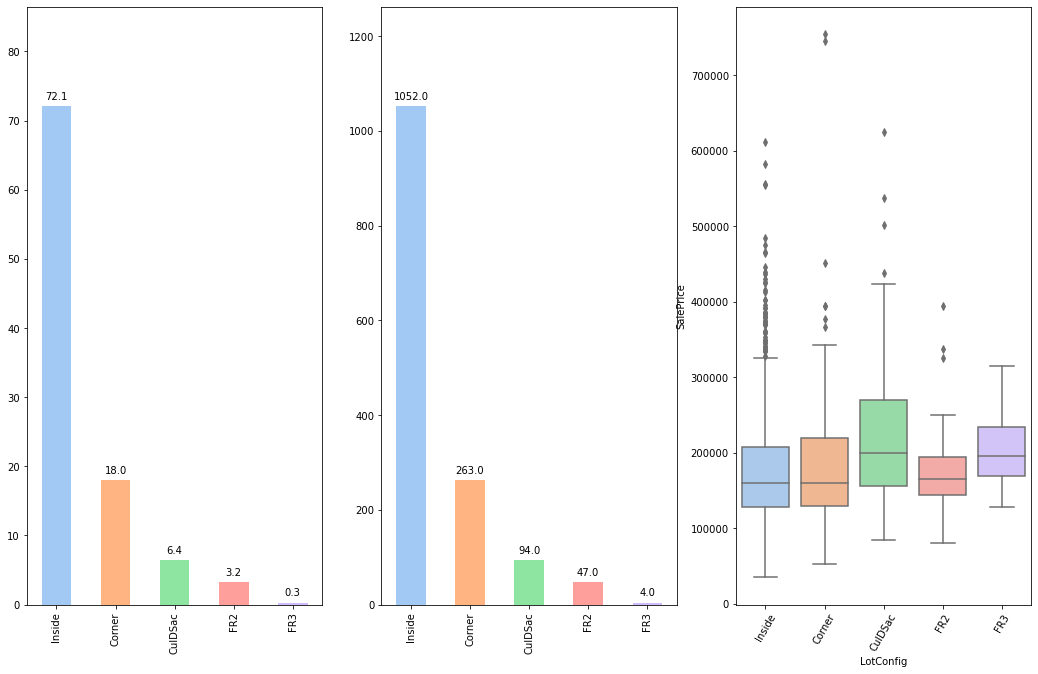

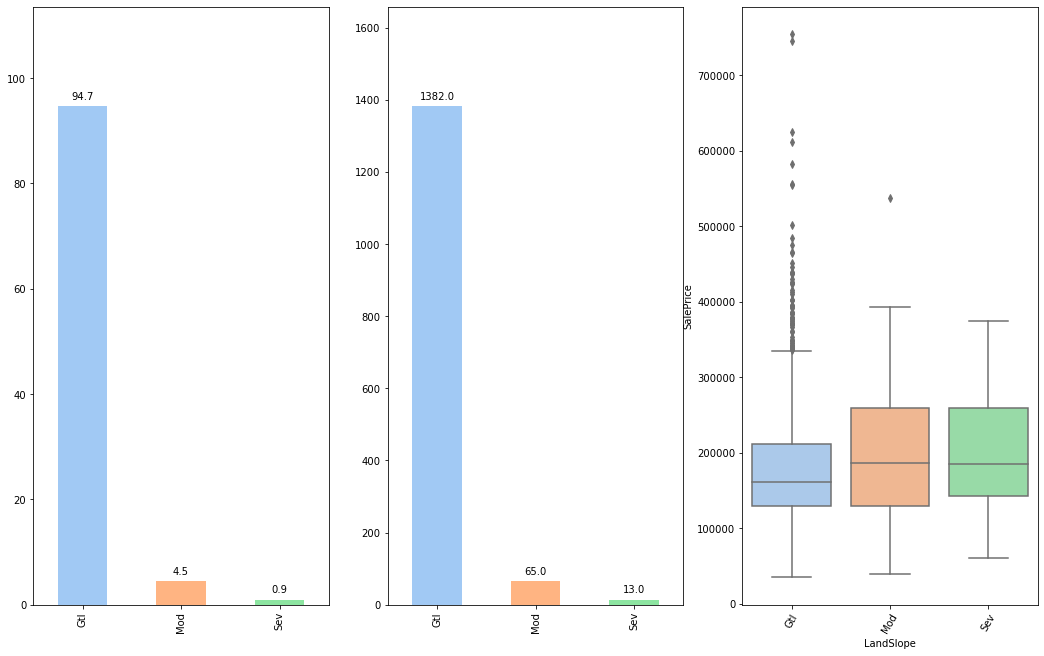

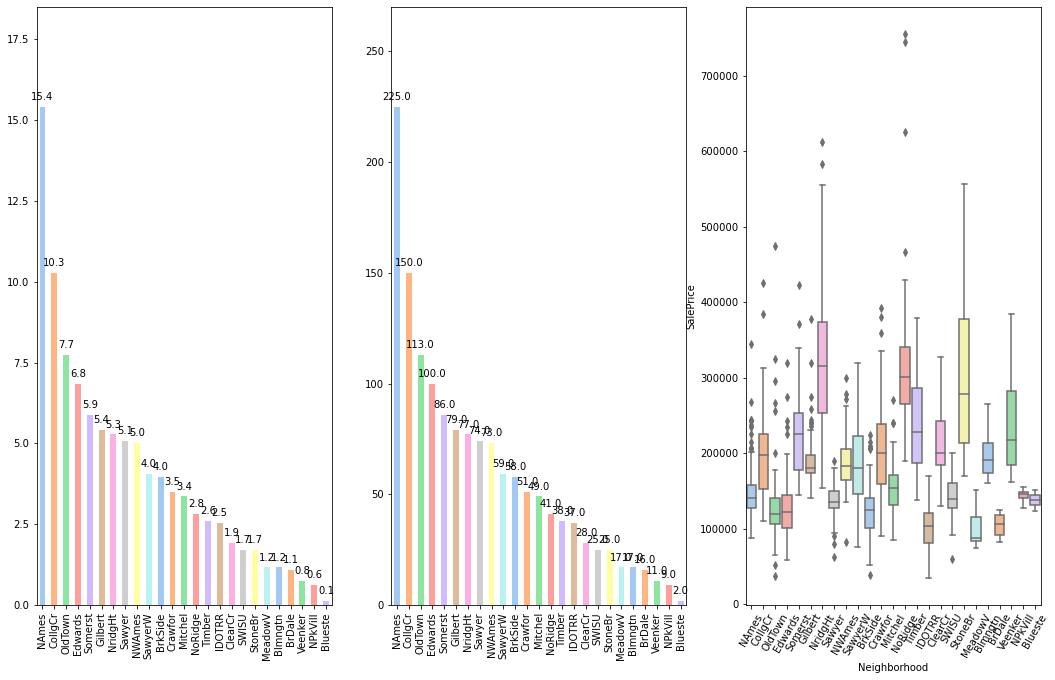

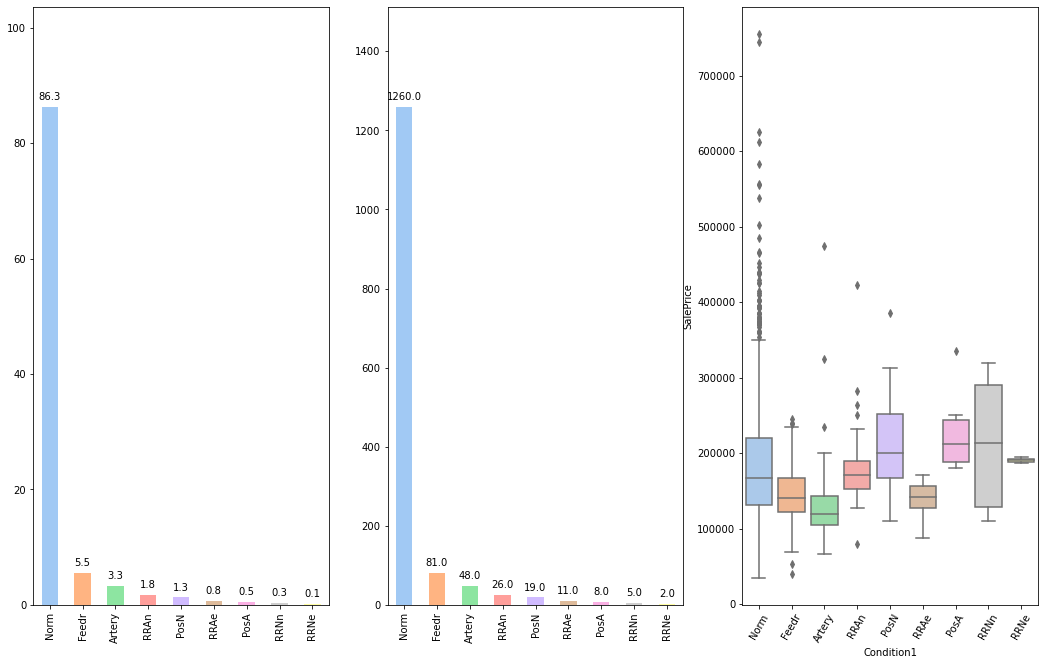

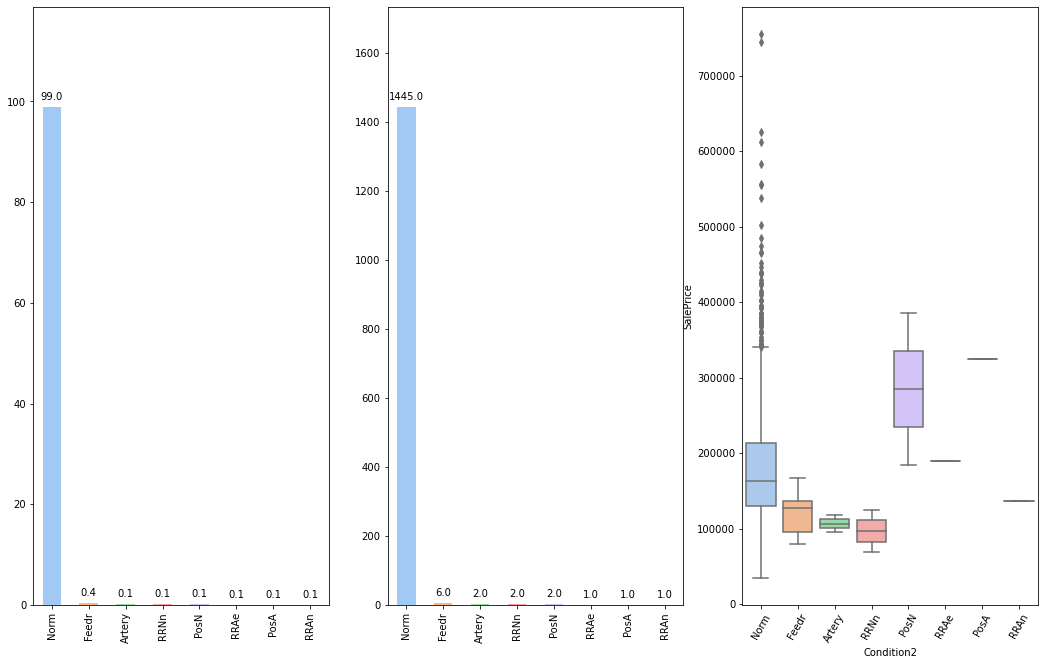

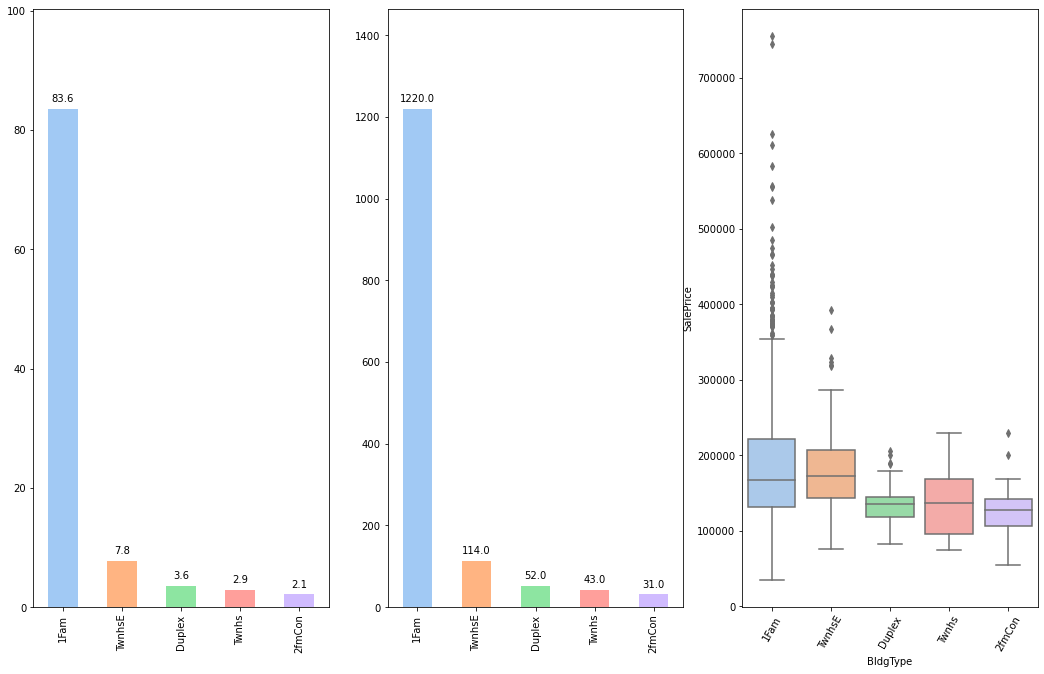

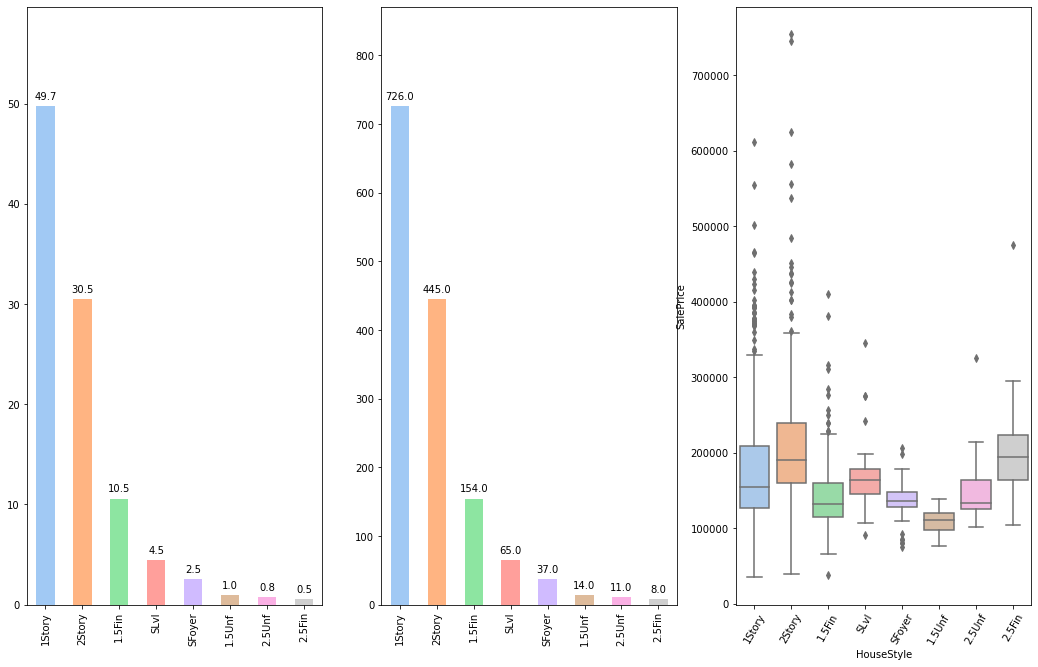

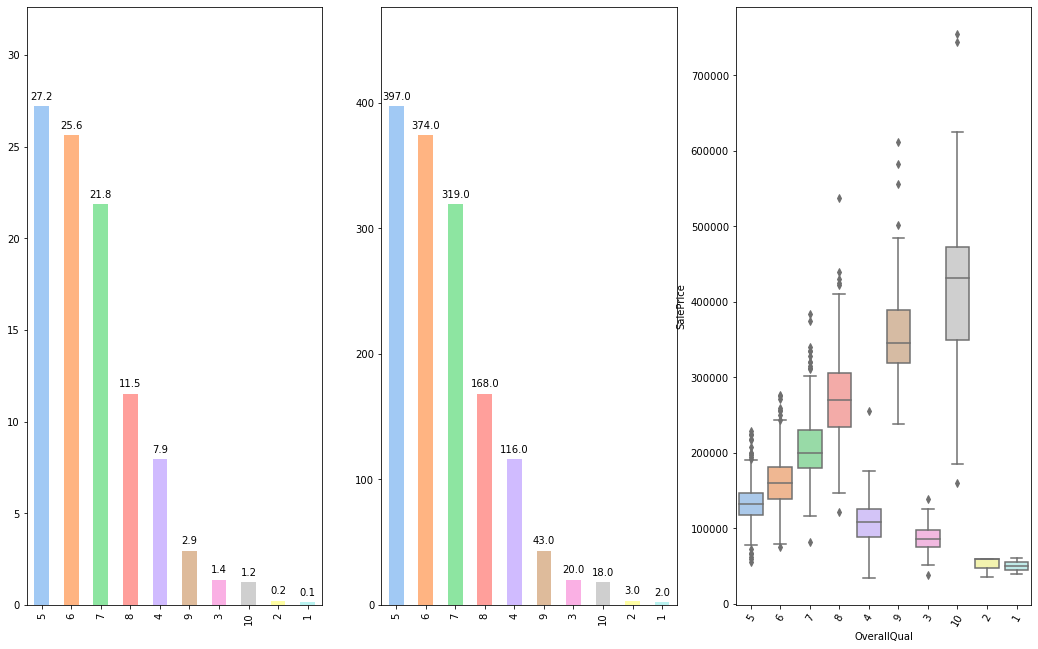

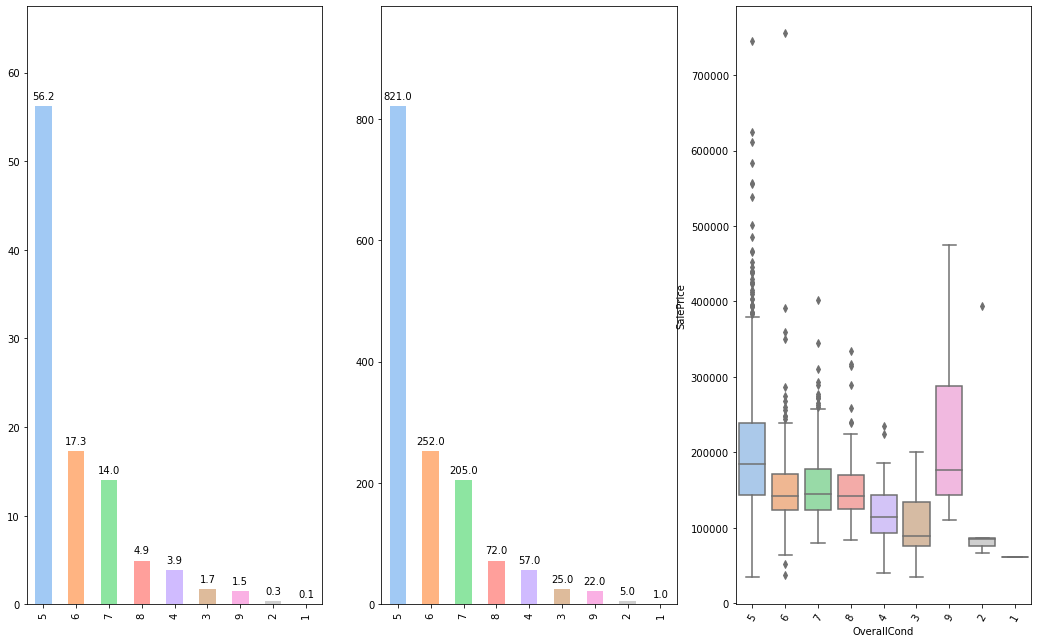

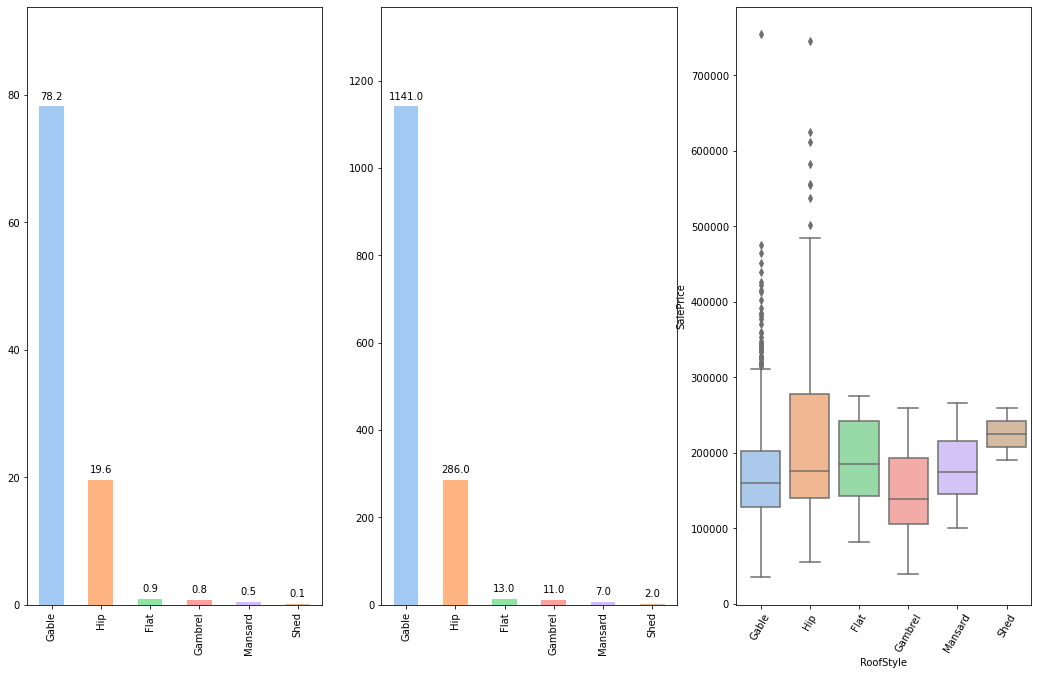

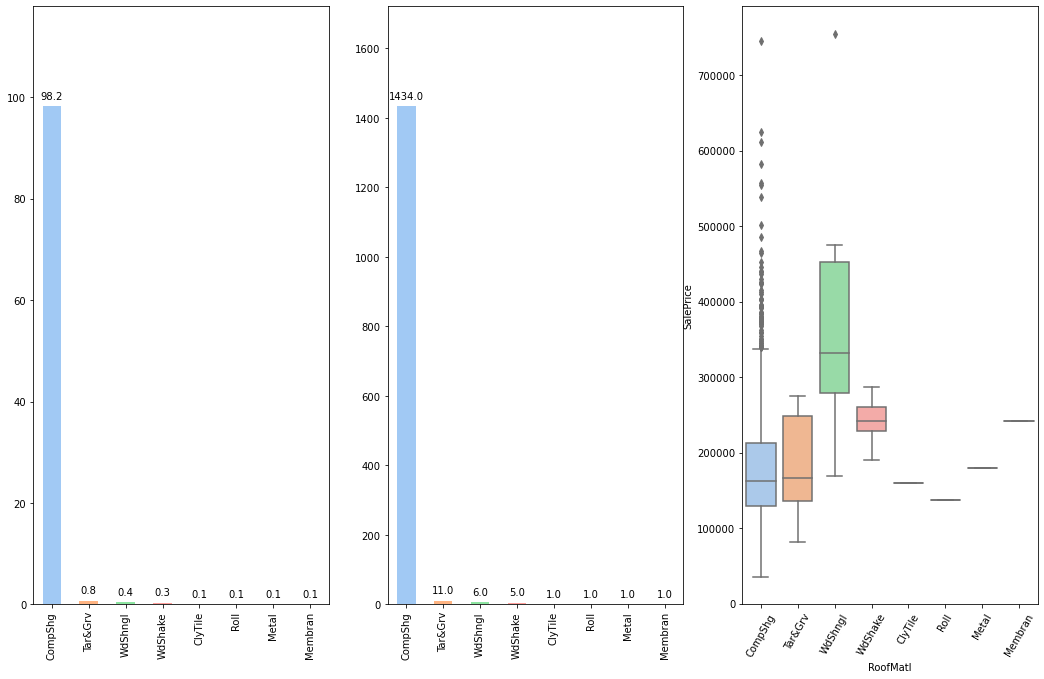

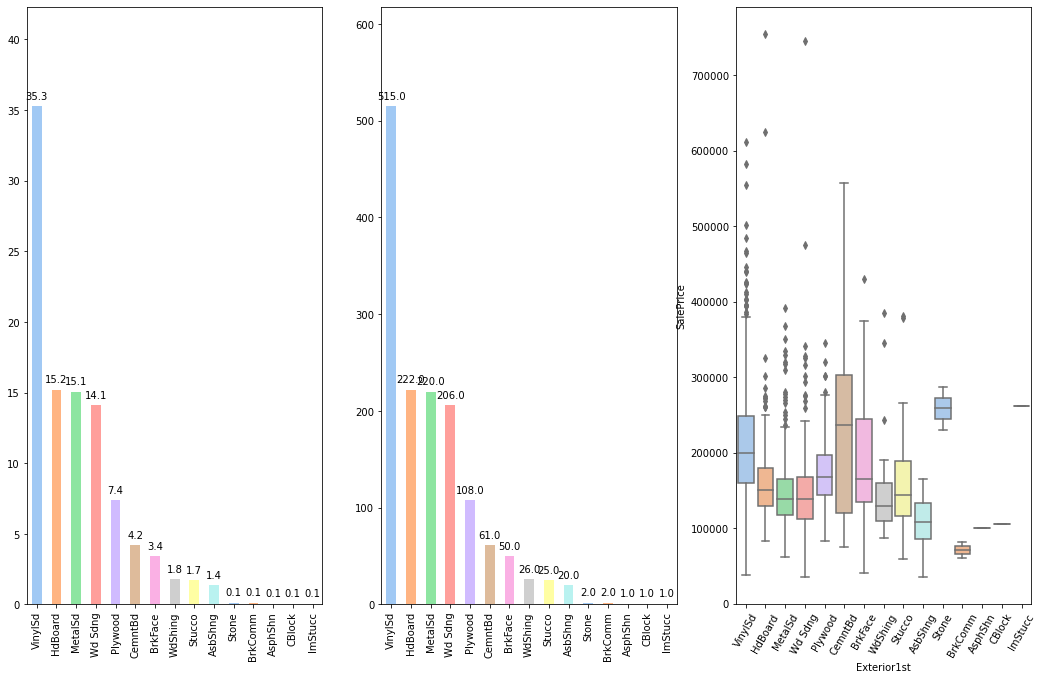

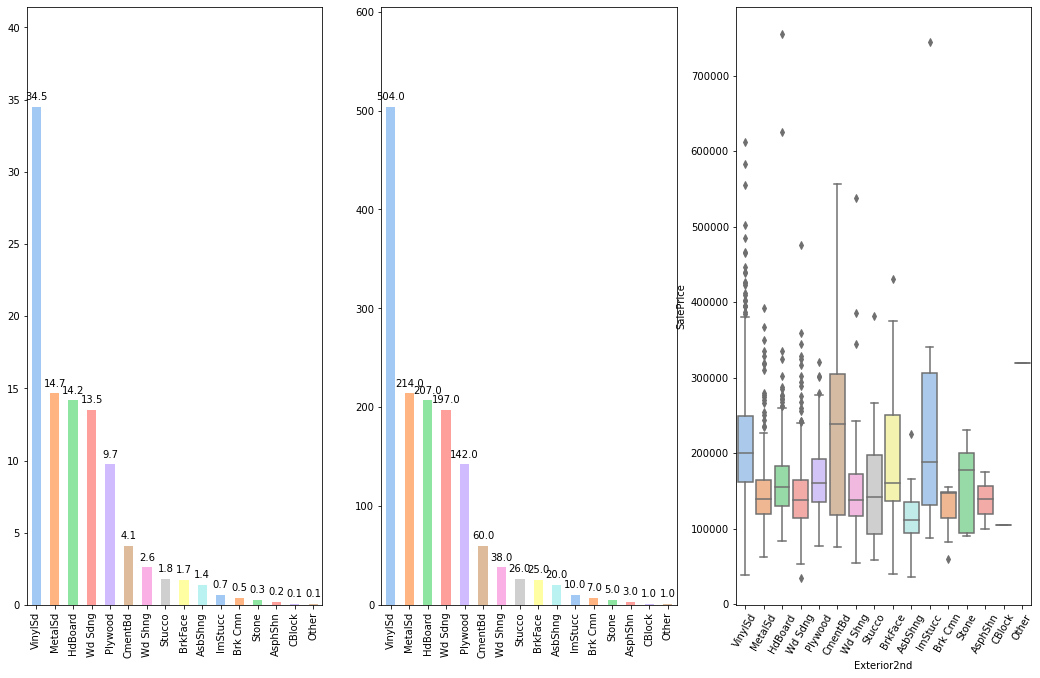

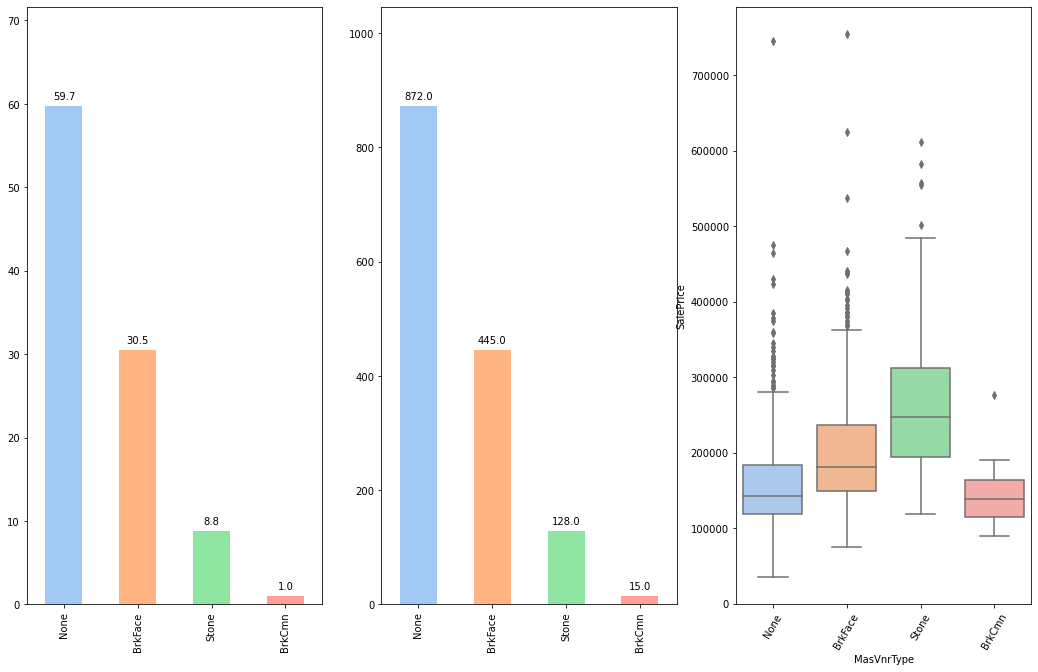

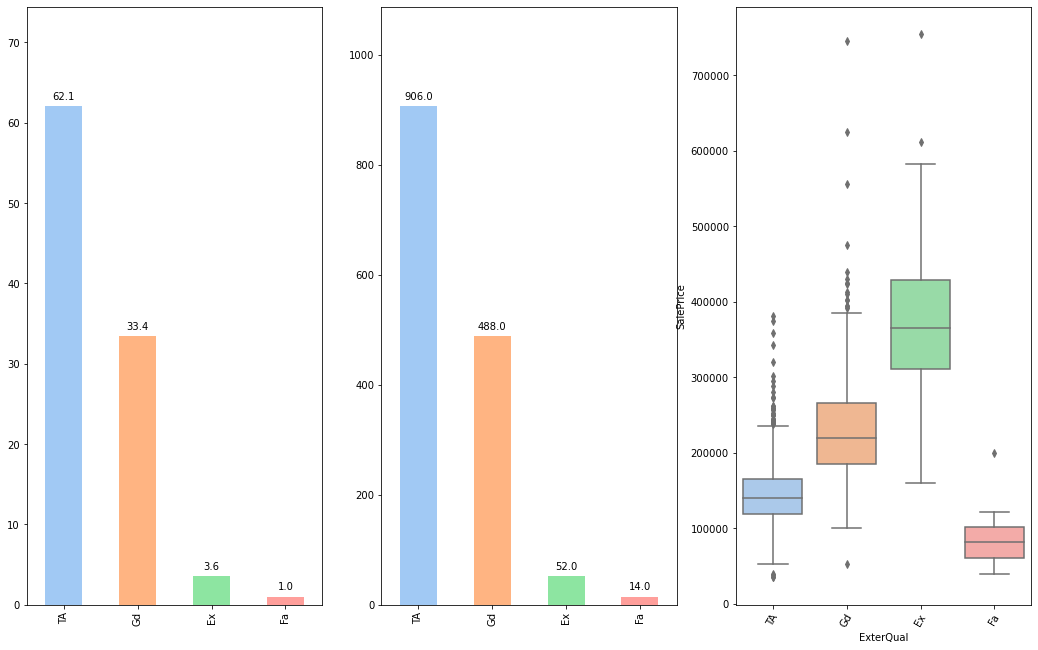

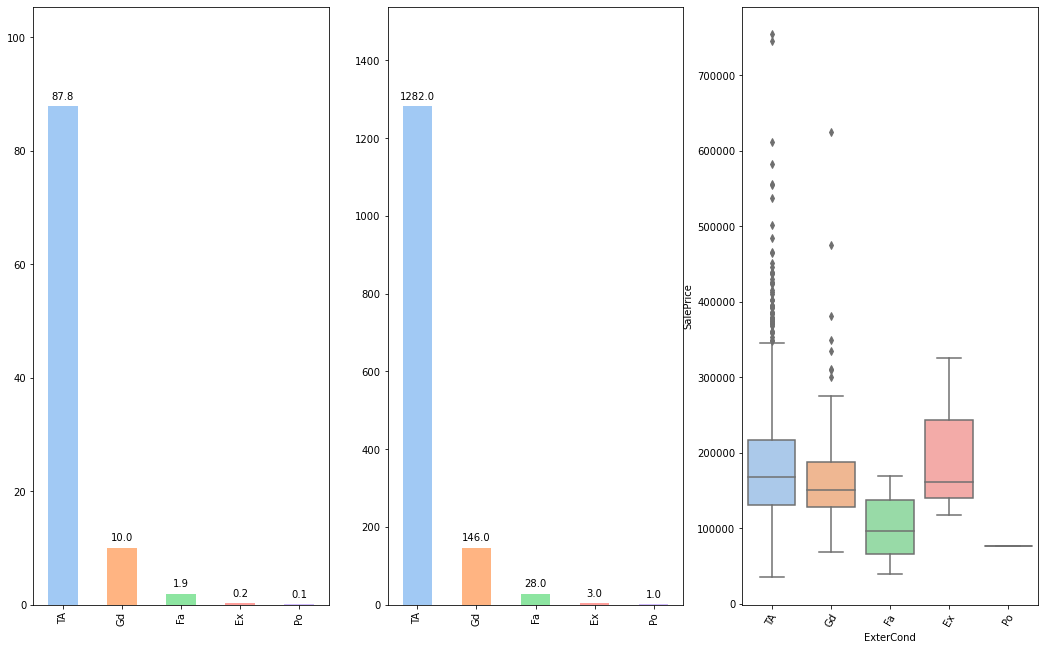

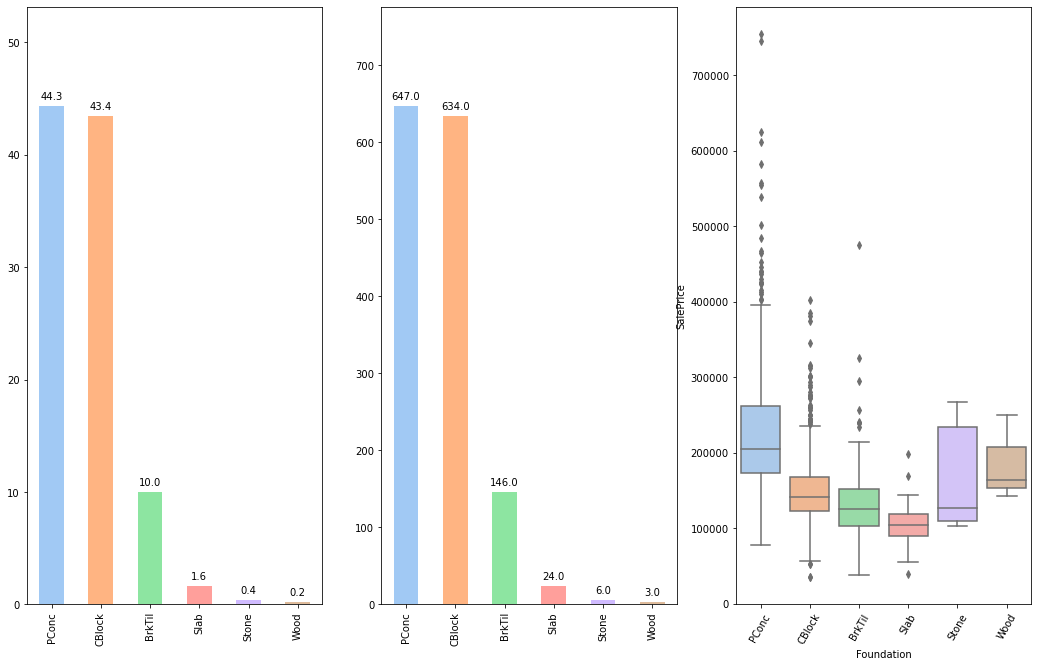

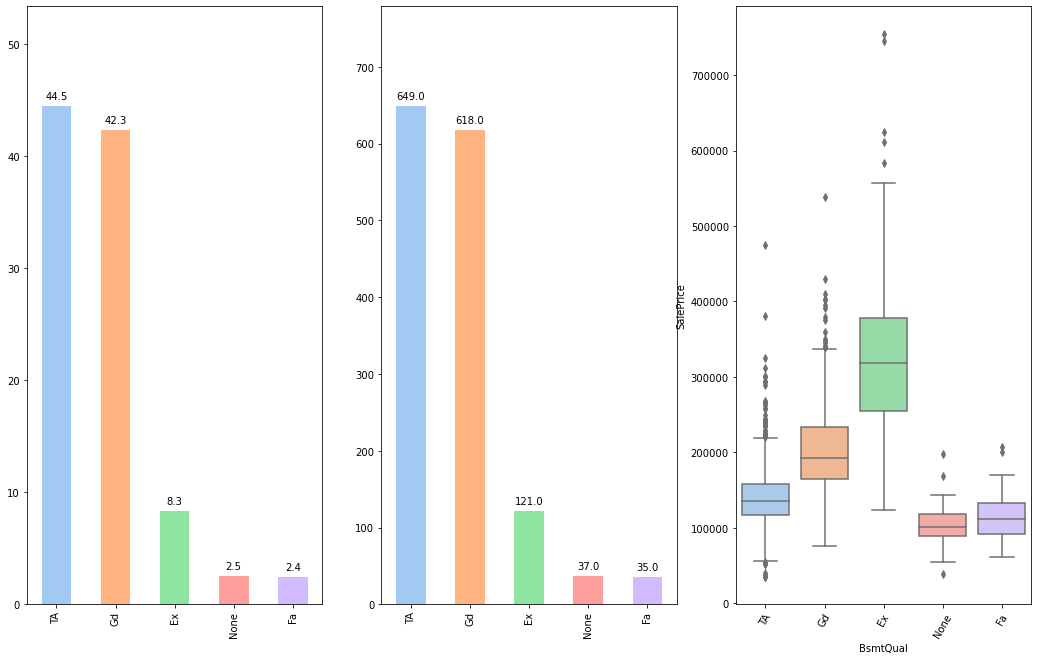

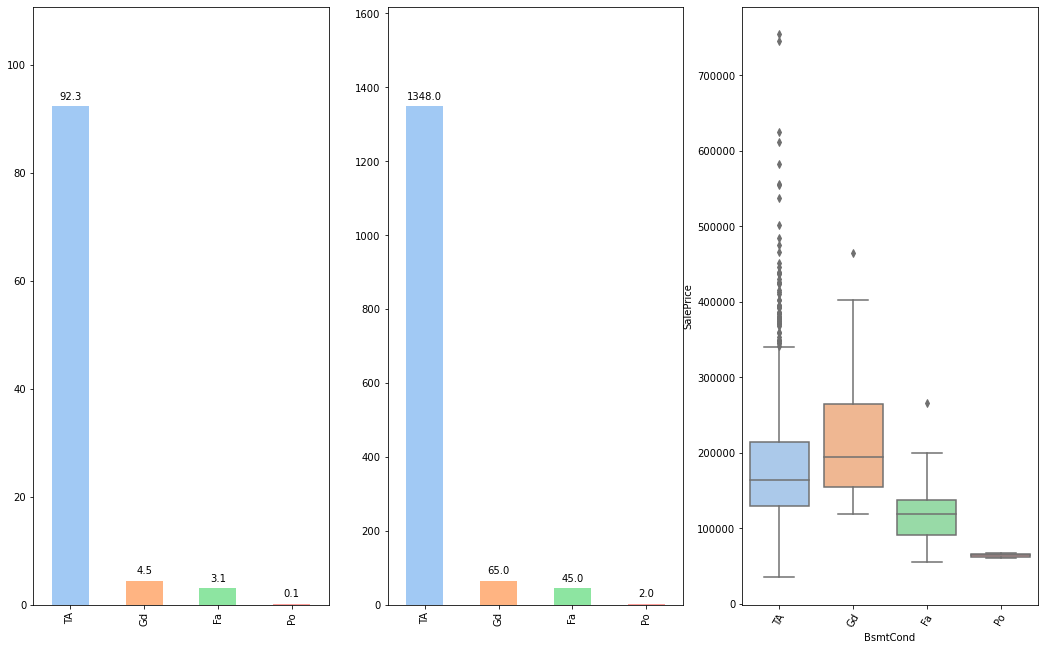

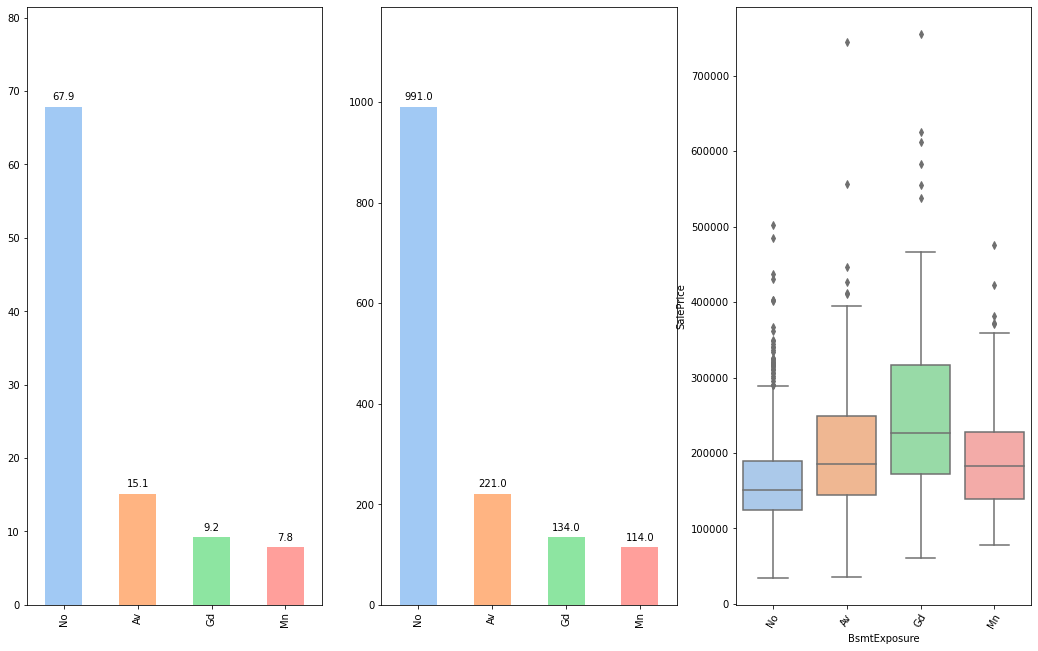

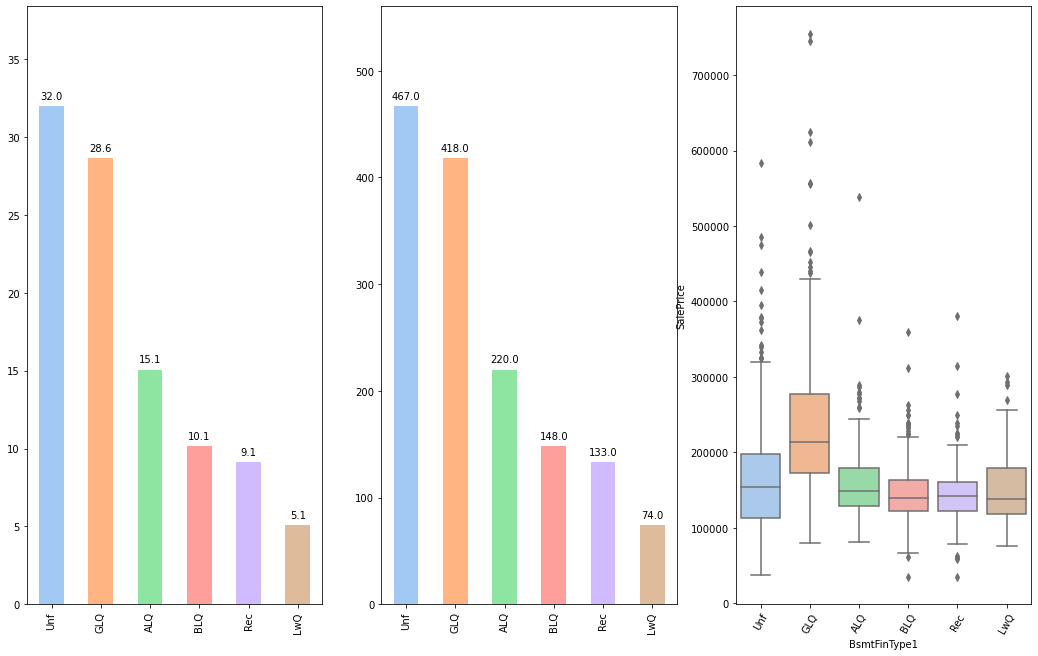

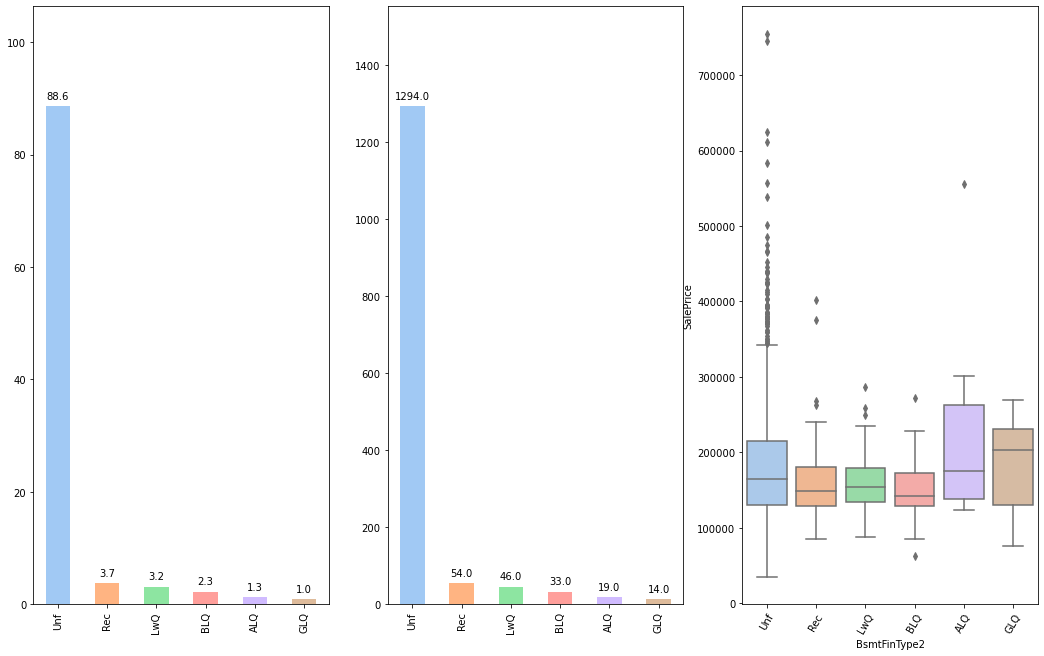

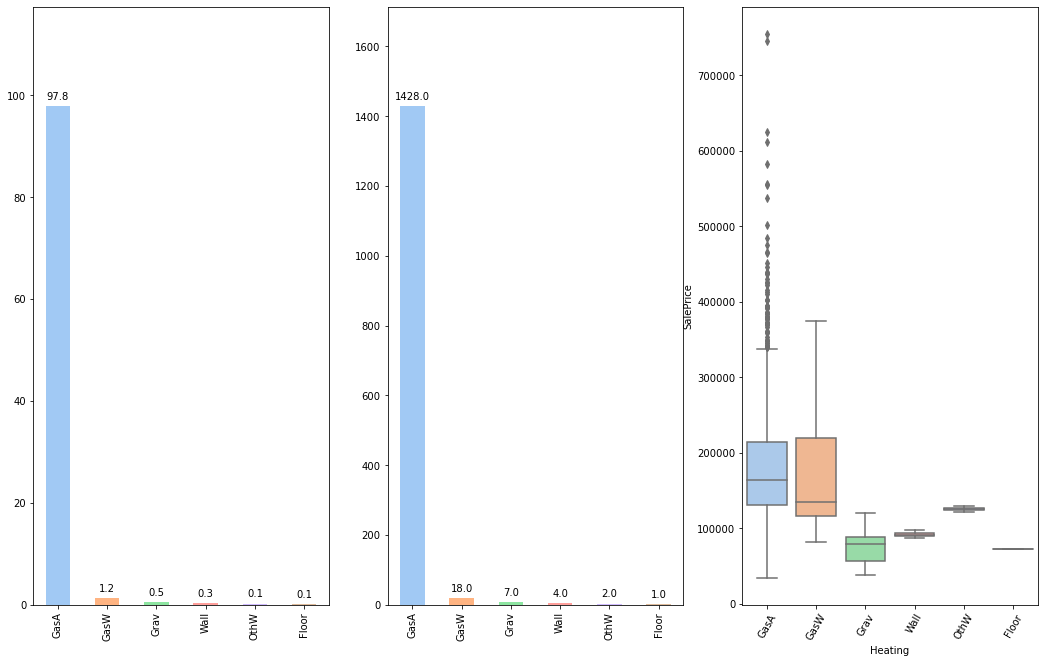

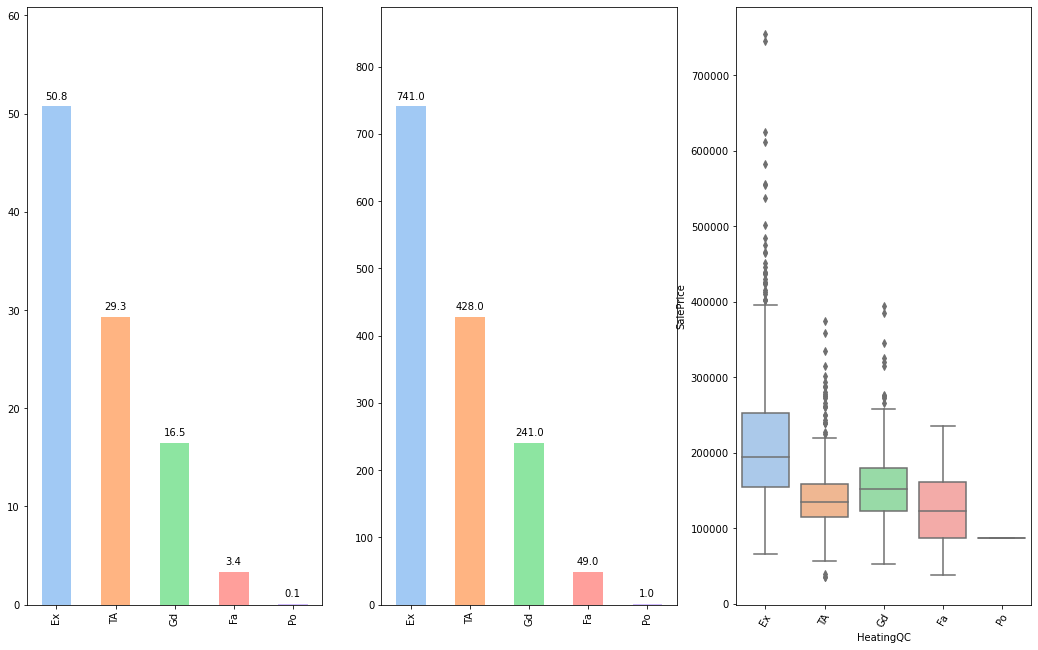

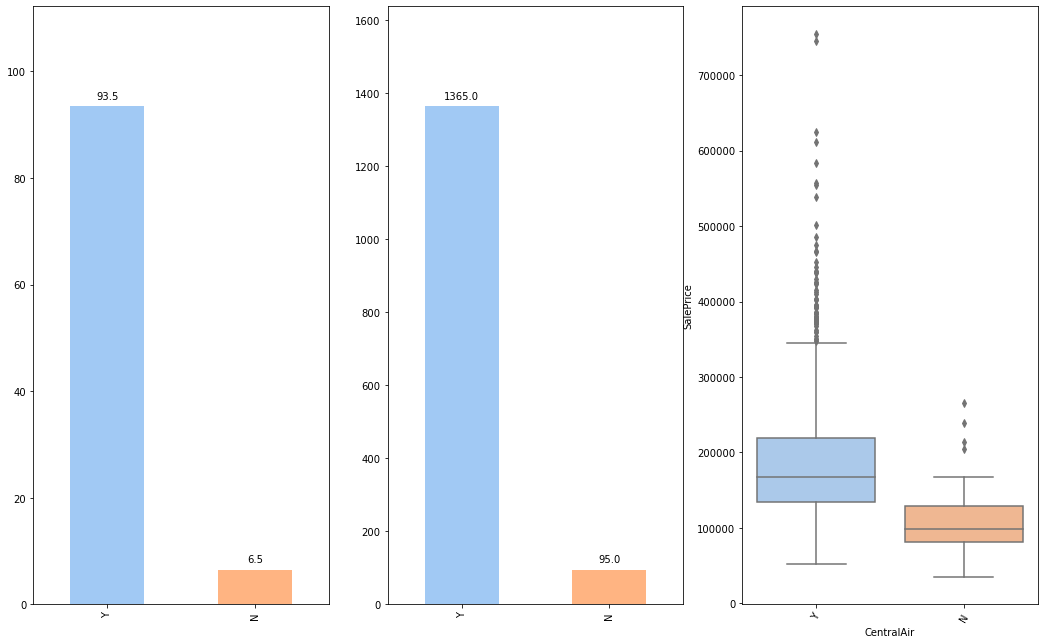

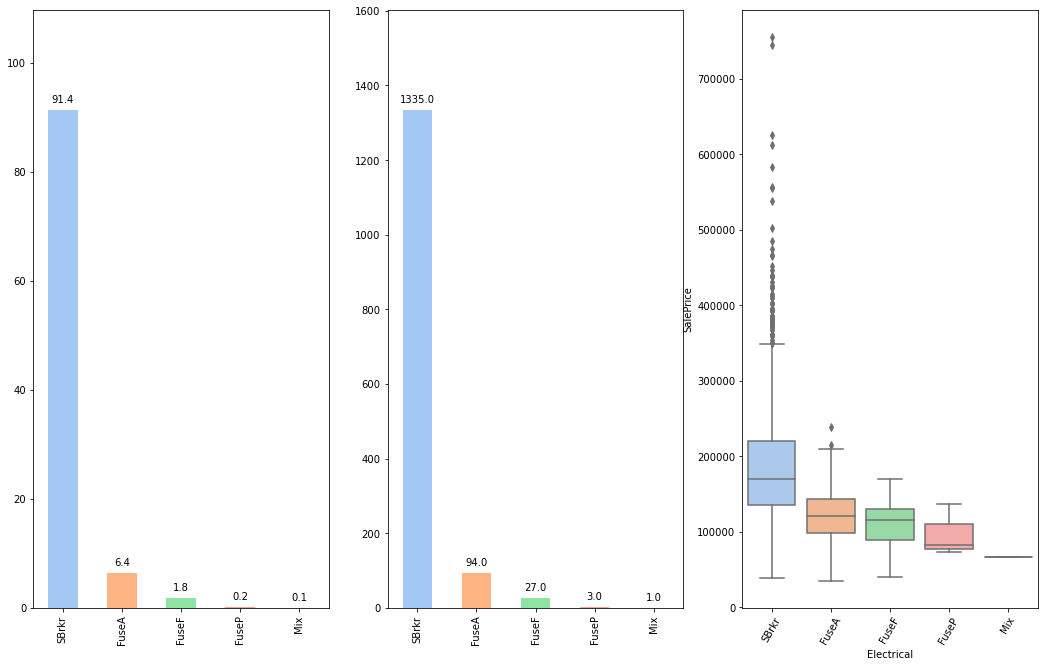

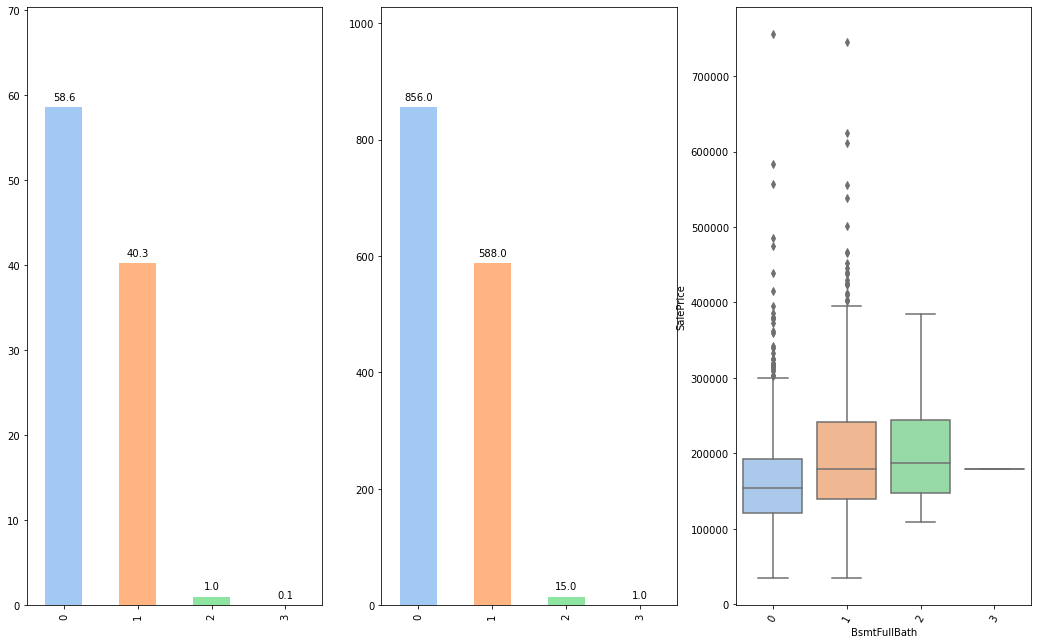

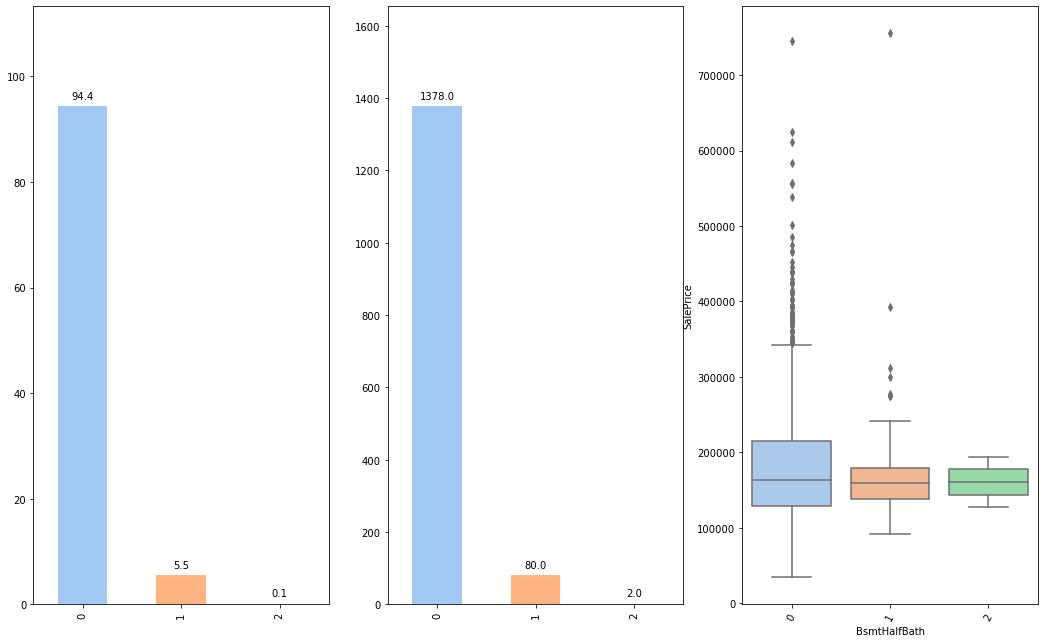

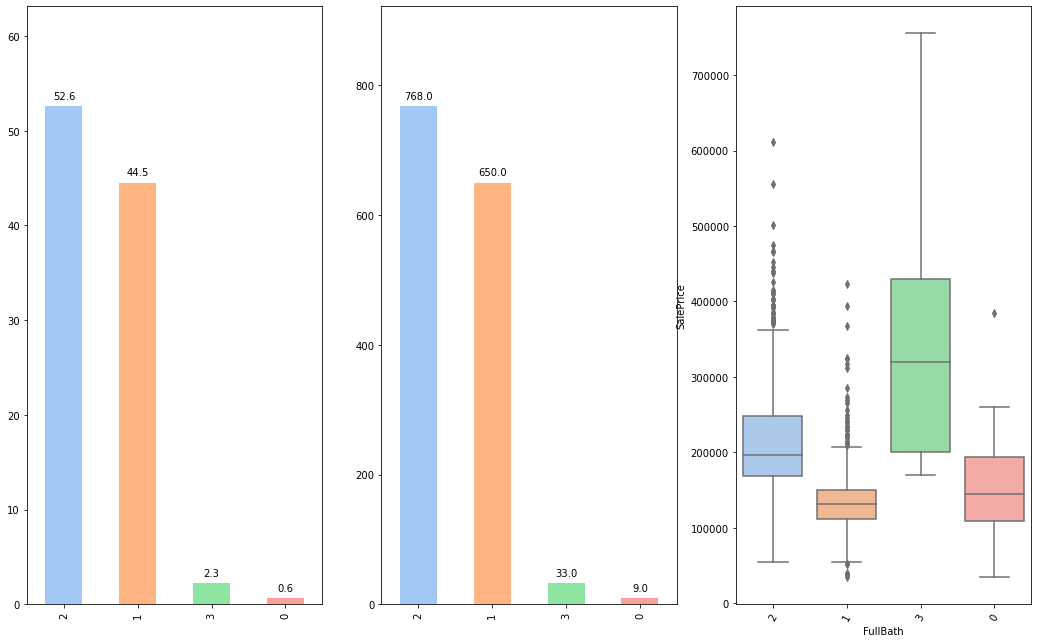

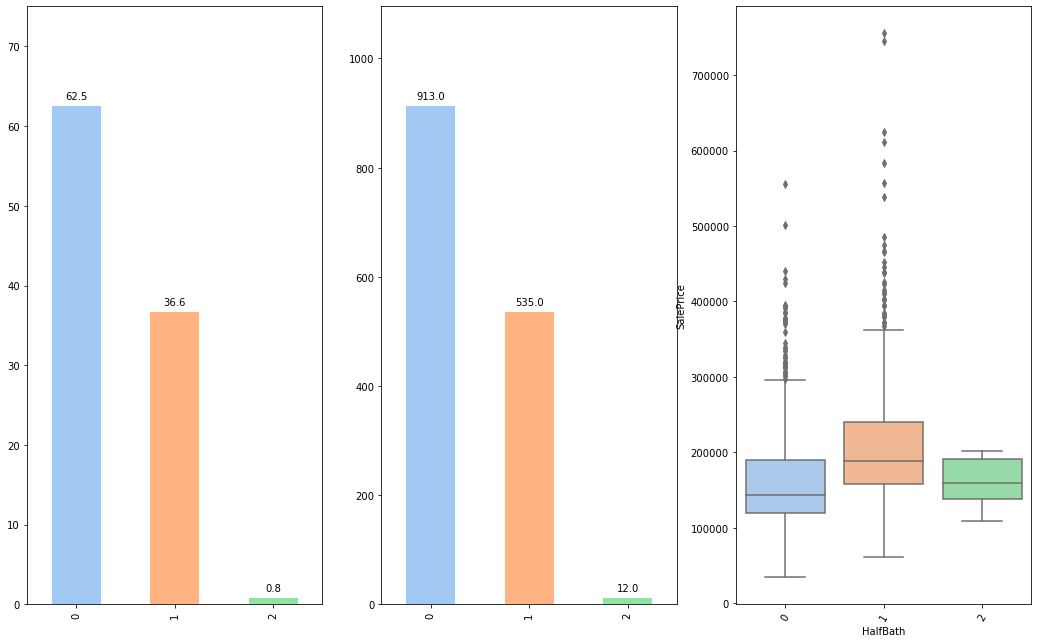

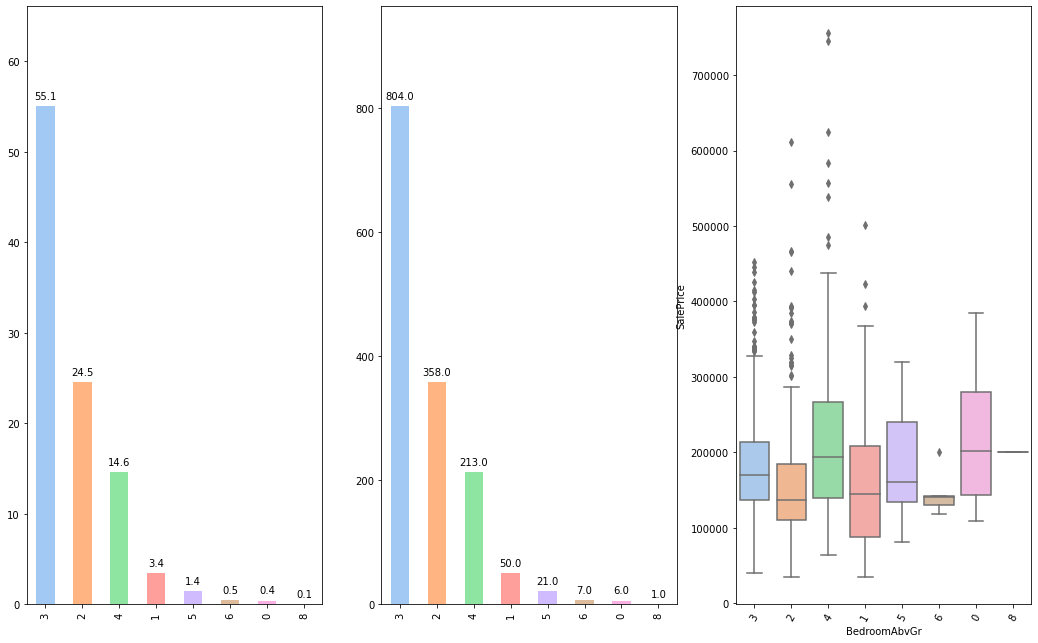

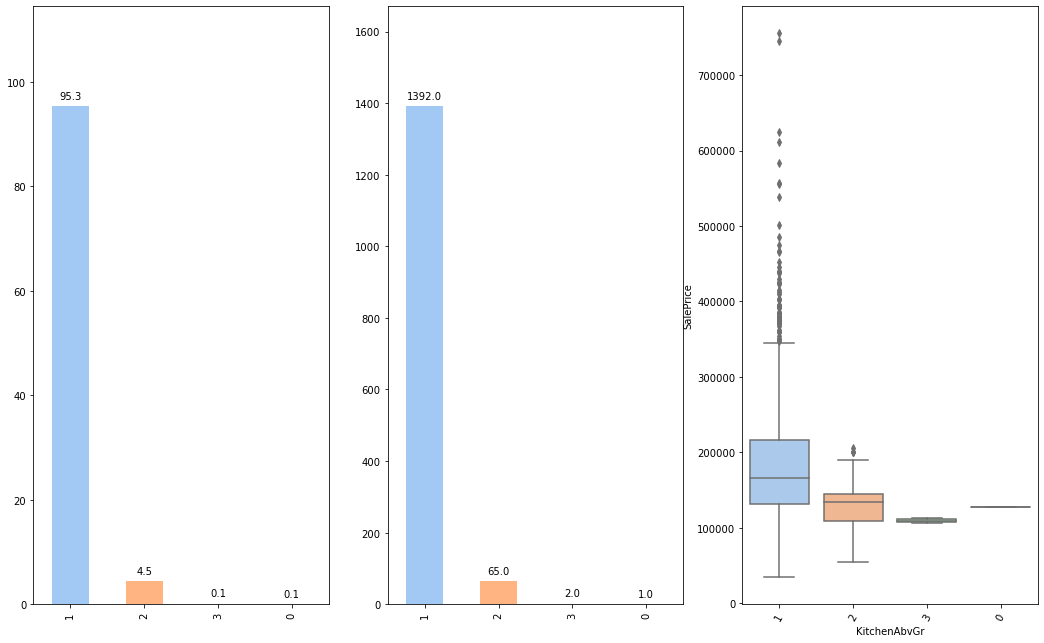

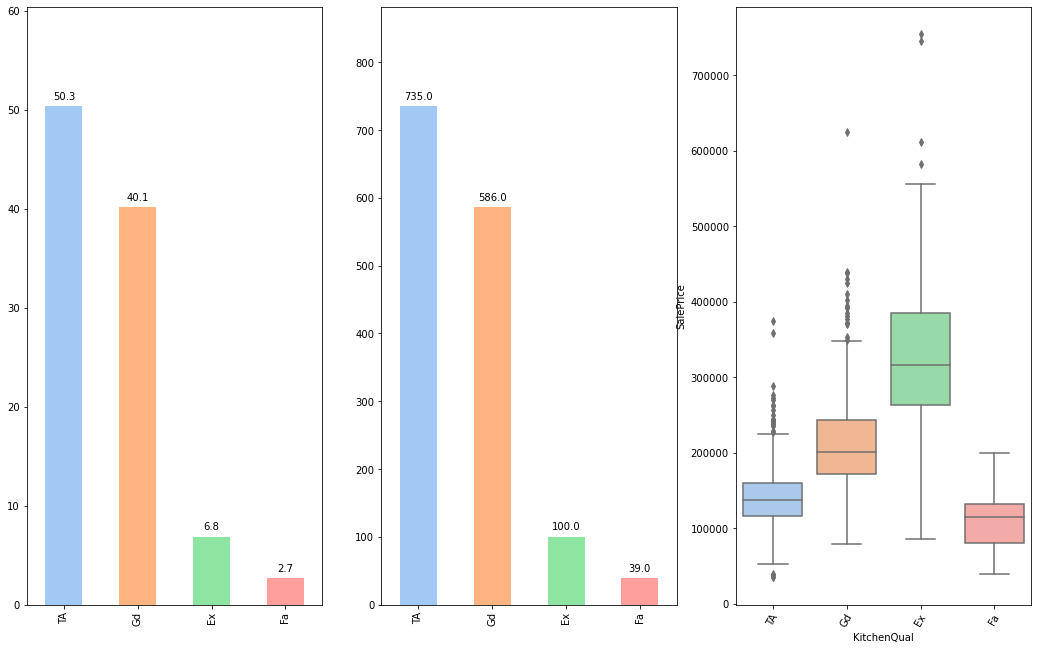

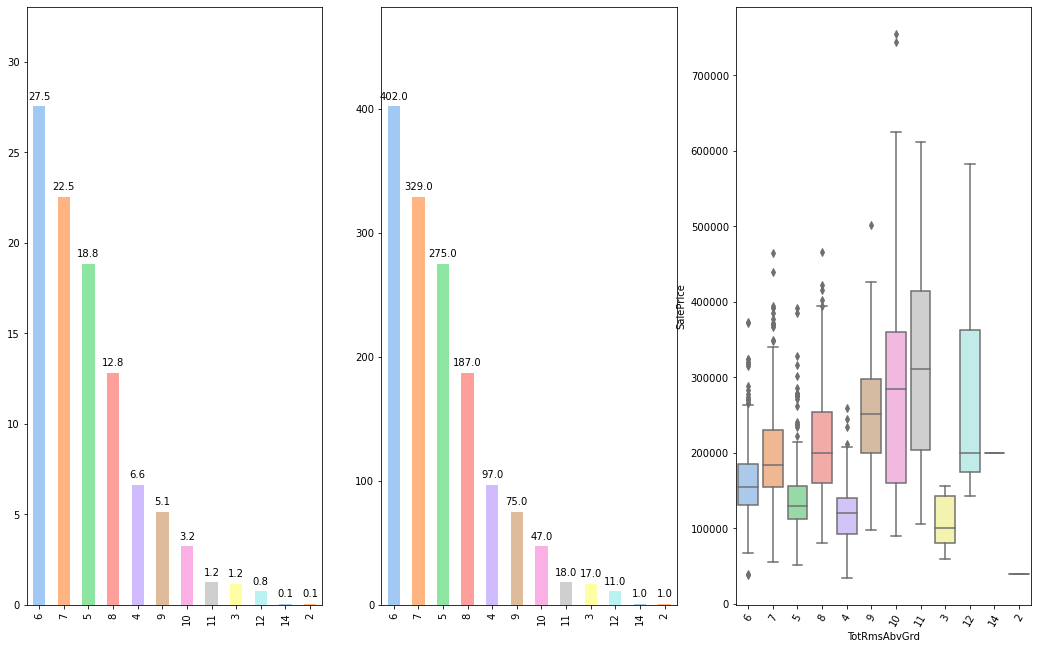

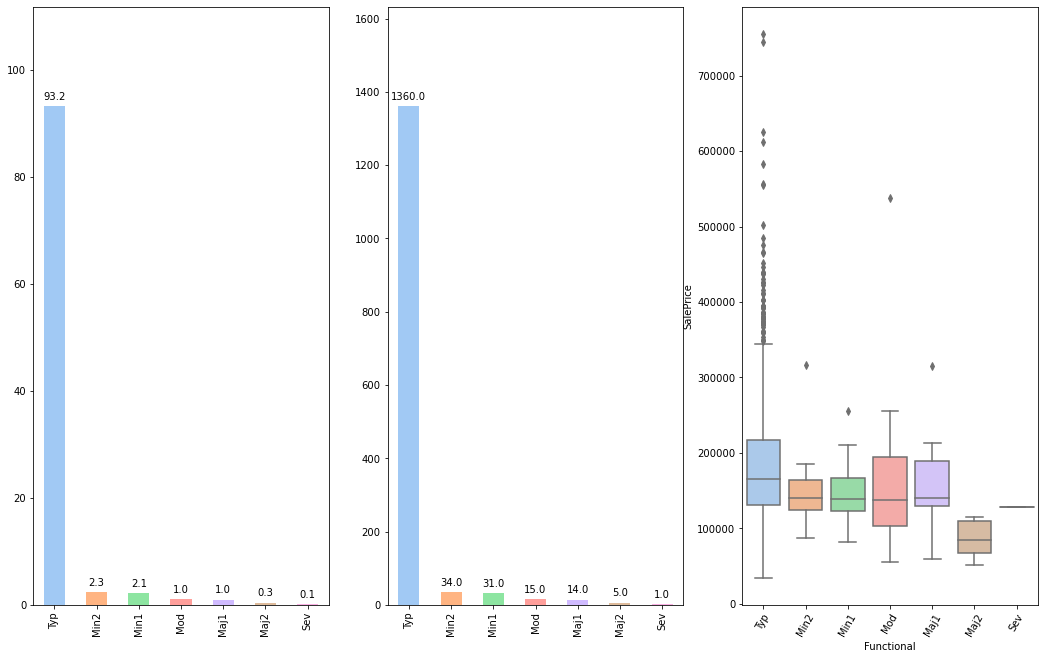

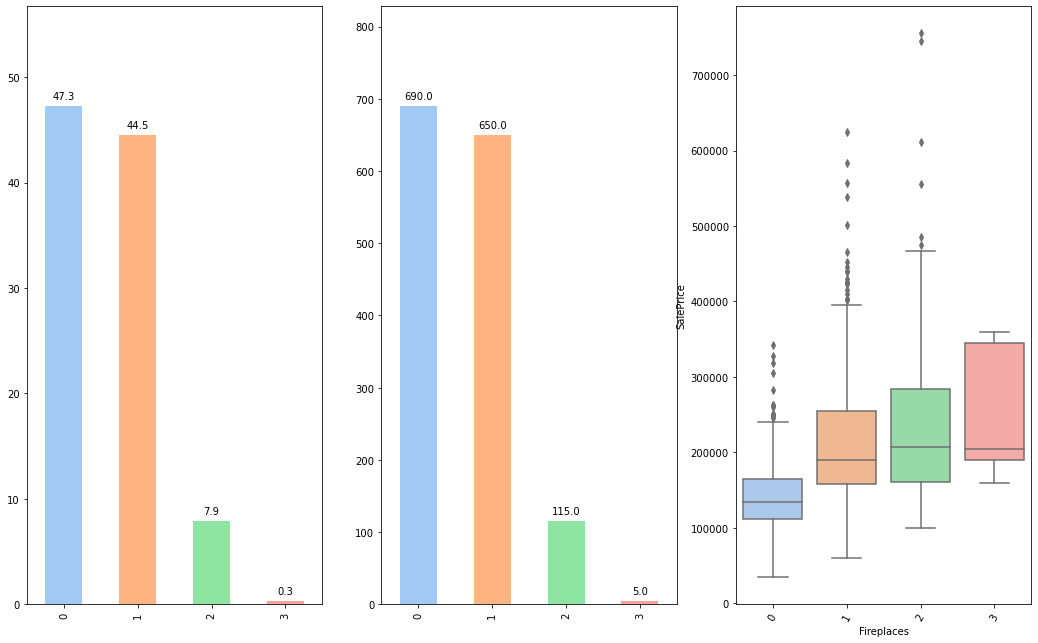

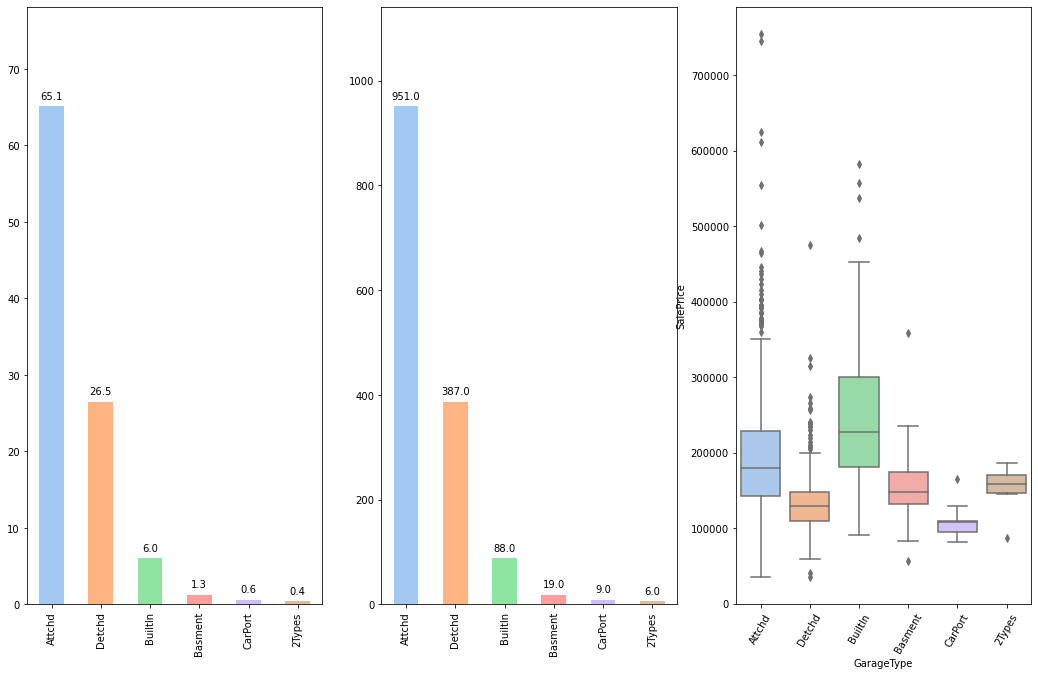

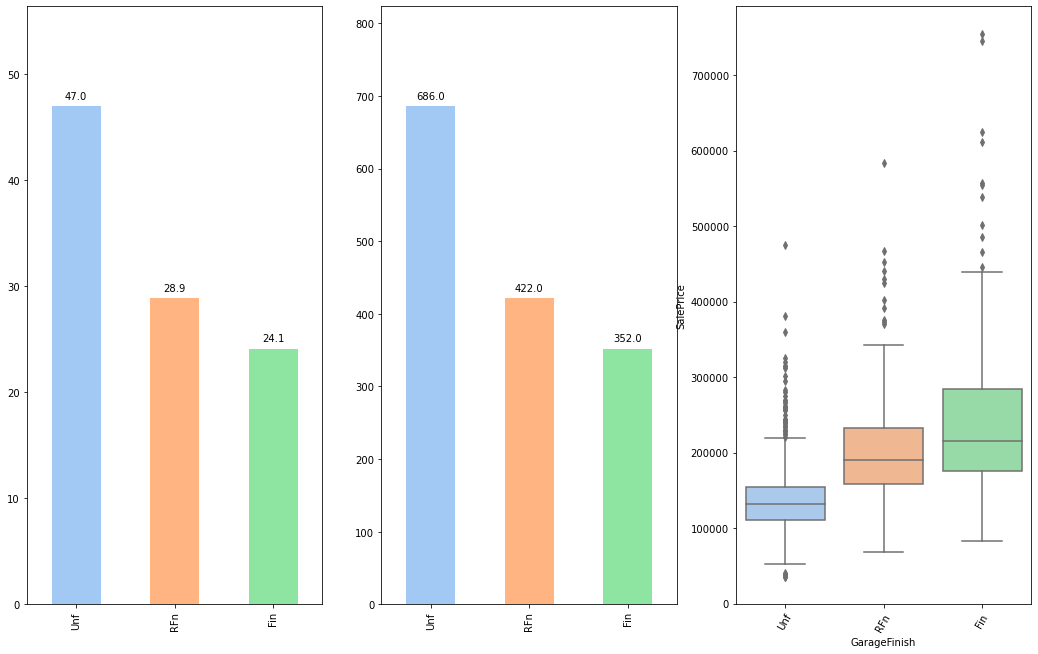

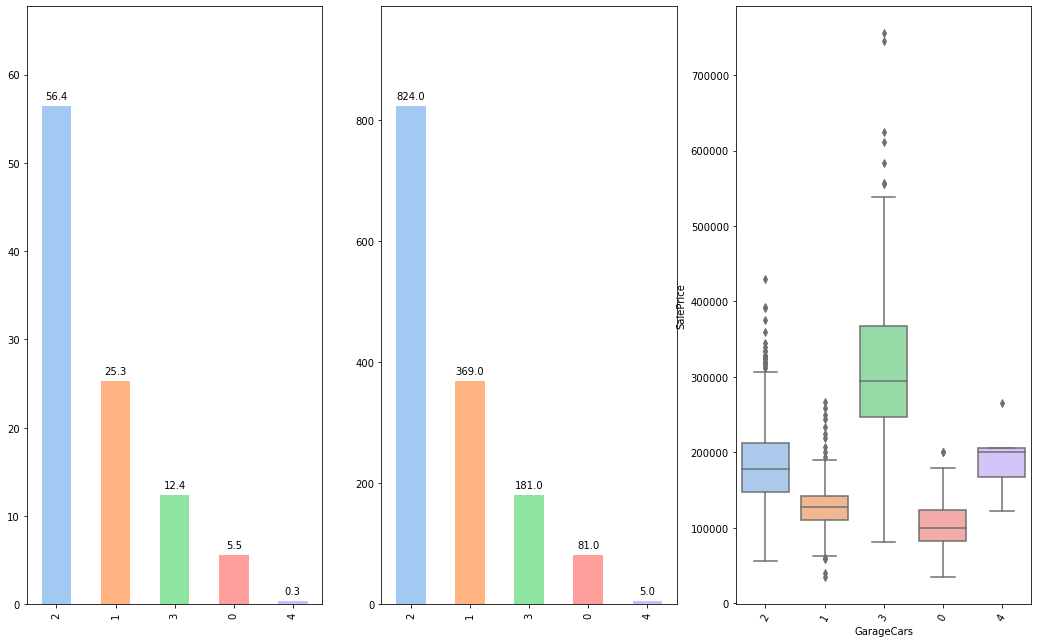

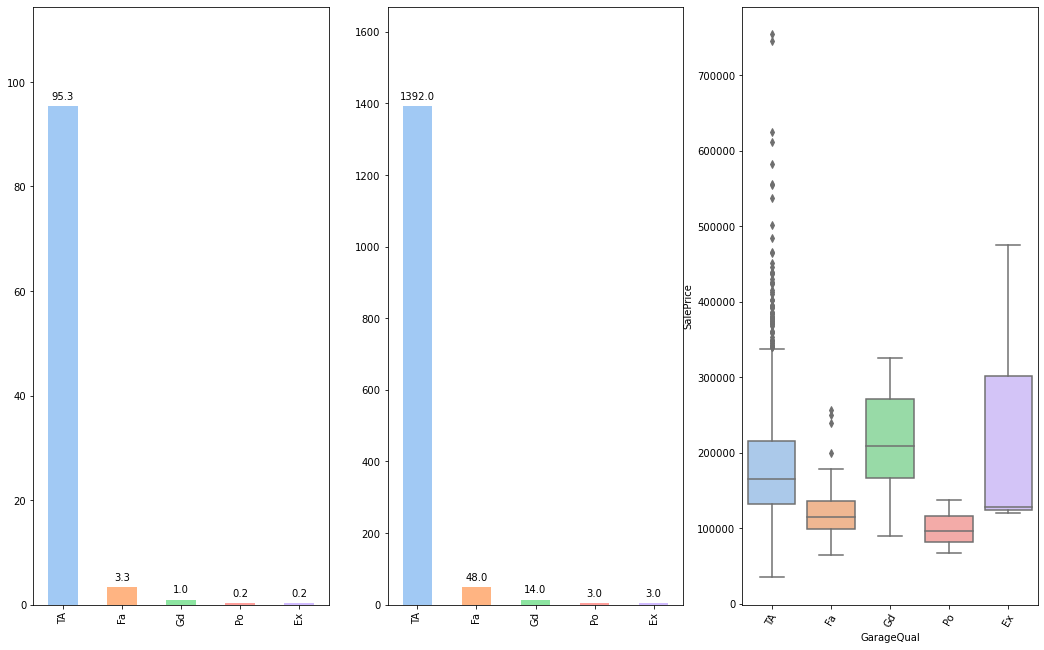

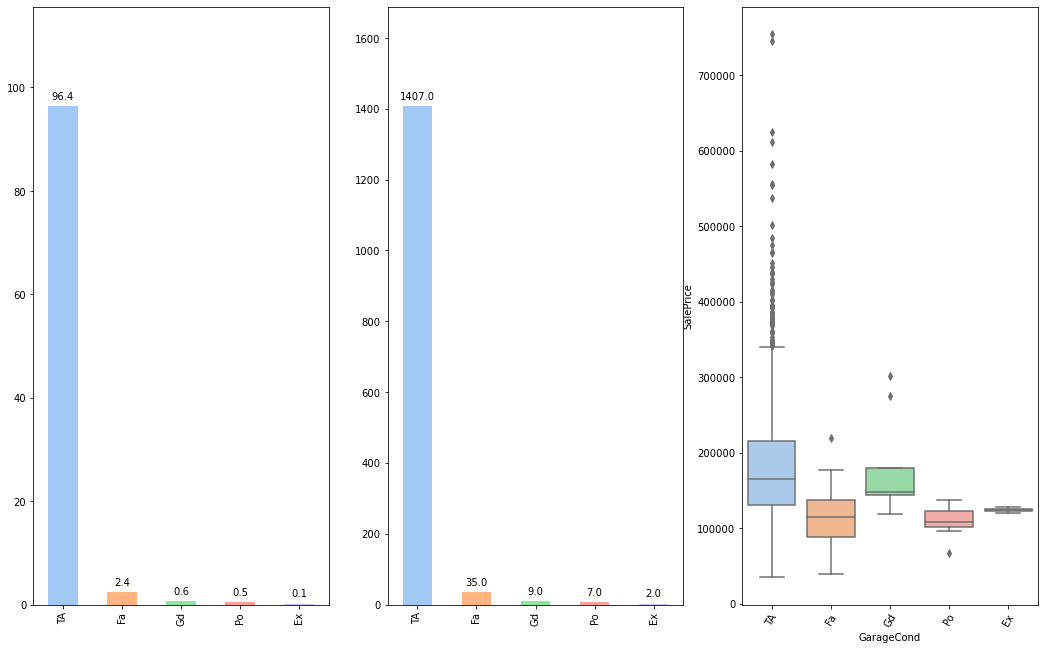

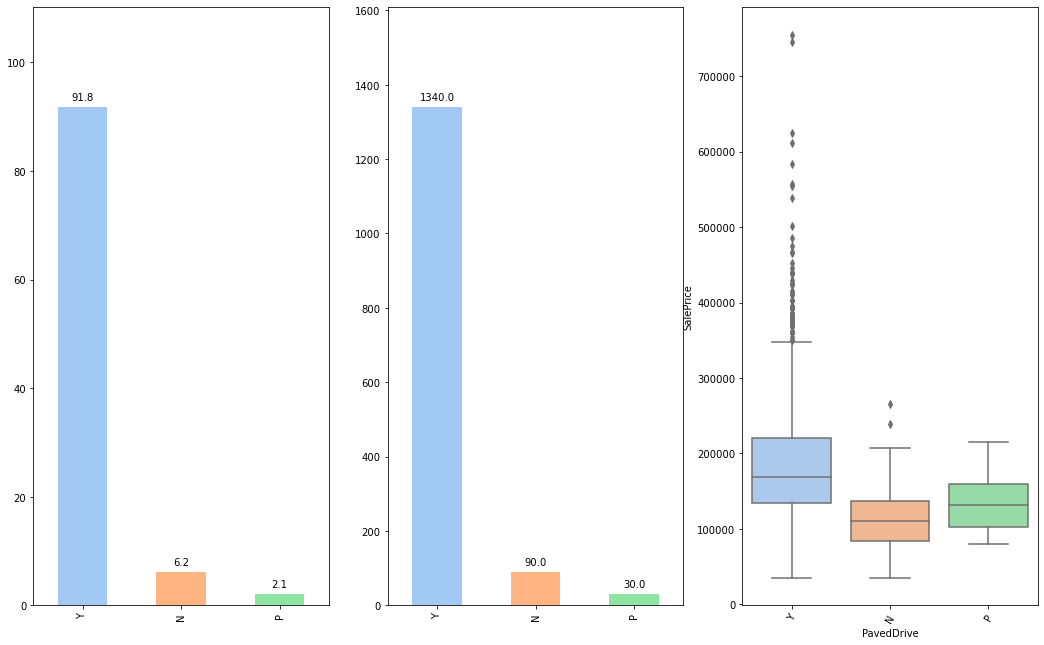

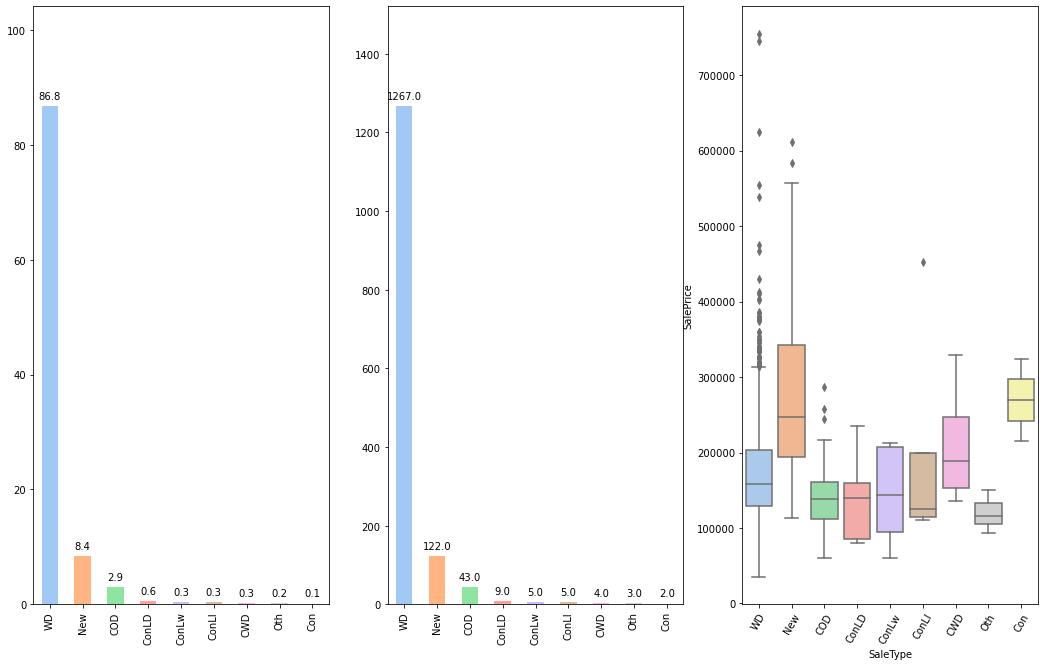

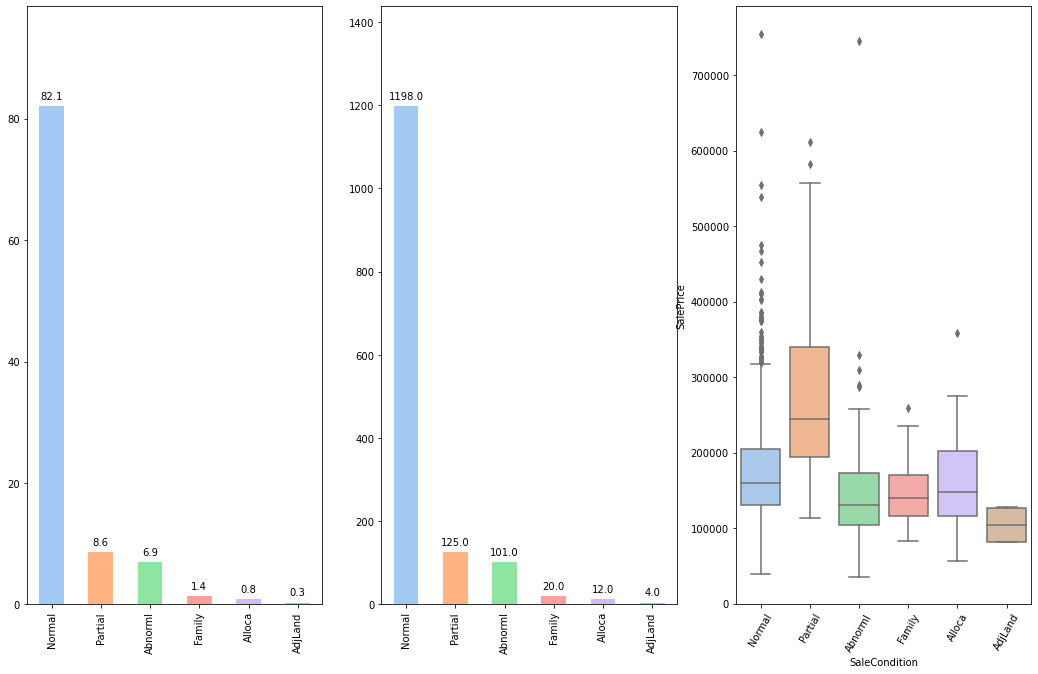

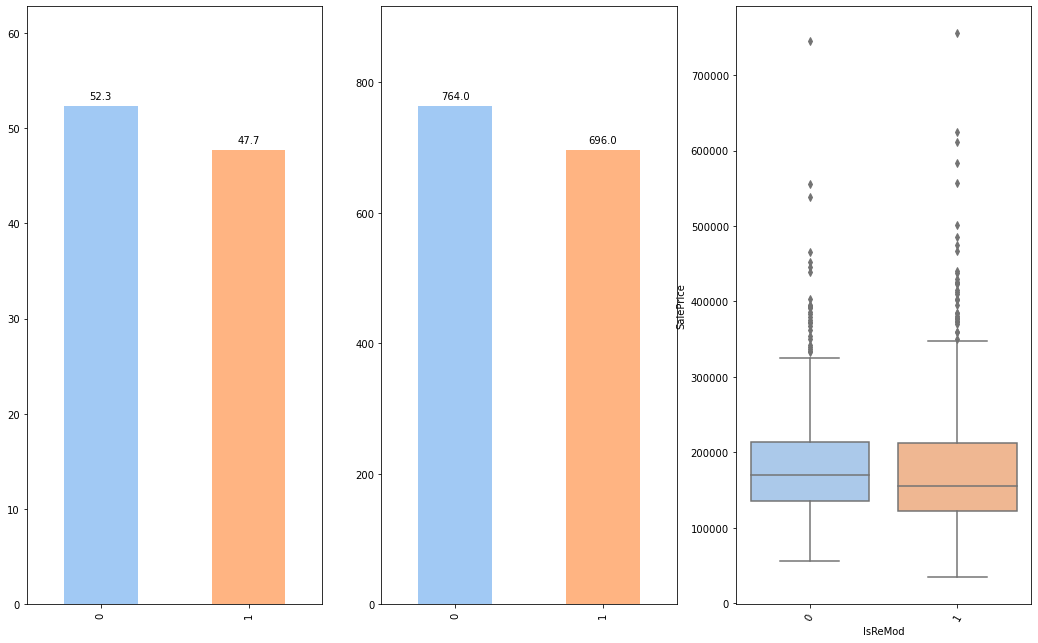

In [62]:
for i in house_cat.columns:
    plot_distribution(i)

In [63]:
# From analysing the above plots, there are few skewed categorical variables. - So, Dropping them
skwd_cat_vars = ['Street','Utilities','Condition2','RoofMatl','BsmtCond','Heating','Functional']

house.drop(columns=skwd_cat_vars,inplace=True)

In [64]:
# for i in house_cat[lst]:
#     plot_distribution(i)

#### Combining minor categories in within categorical variables

In [65]:
# GarageQual GarageCond IsReMod

In [66]:
lst = ['Electrical','BsmtHalfBath','PavedDrive']
for i in lst:
    house[i].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [67]:
house['Electrical_SBrkr'] = np.where(house['Electrical'] == 'SBrkr', 1,0)

In [68]:
house['IsBsmtHalfBath'] = np.where(house['BsmtHalfBath'].astype(str).str.strip() == '0', 0,1)

In [69]:
house['IsFullyPavedDrive'] = np.where(house['PavedDrive'].astype(str).str.strip() == 'Y', 1,0)

In [70]:
house.drop(columns=lst, inplace=True)

In [71]:
lst = ['Electrical_SBrkr','IsFullyPavedDrive','IsBsmtHalfBath']

# changing type
house[lst] = house[lst].astype(object)

for i in lst:
    house[i].value_counts()


1    1335
0     125
Name: Electrical_SBrkr, dtype: int64

1    1340
0     120
Name: IsFullyPavedDrive, dtype: int64

0    1378
1      82
Name: IsBsmtHalfBath, dtype: int64

### Analyzing the target variable - SalePrice

In [72]:
house.SalePrice.isnull().sum()

0

In [73]:
house.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

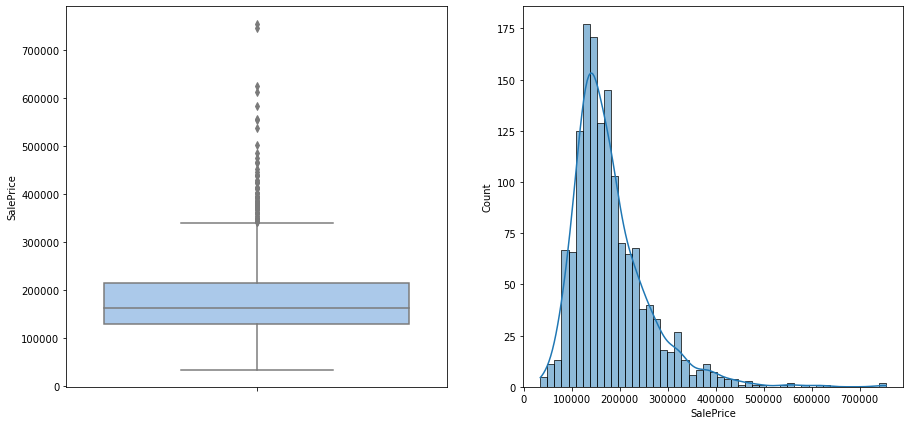

In [74]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=house,y='SalePrice',palette='pastel');
plt.subplot(1,2,2)
sns.histplot(data=house,x='SalePrice',kde=True,palette='pastel');

- The SalePrice is Right-Skewed.
- We need to fix this as the Regression line will deviate bcoz of outliers.
- Probable ways could be:
    - Capping the values
    - Dropping the Outliers
- The above techniques NOT PREFERRED, as it will cause LR Model to not predict values in higher range.
- This would be fixed with the help of Transformation. - _**Log Transformation**_ of the target variable.

In [75]:
# Applying the log transformation technique on the SalePrice column to convert into a normal distributed data
house['SalePriceLog'] = np.log(house['SalePrice'])

# Dropping SalePrice
house.drop(columns='SalePrice',inplace=True)

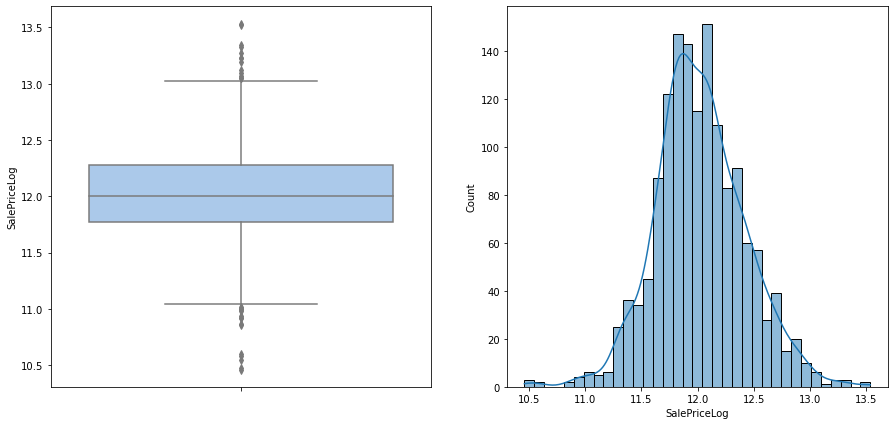

In [76]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=house,y='SalePriceLog',palette='pastel');
plt.subplot(1,2,2)
sns.histplot(data=house,x='SalePriceLog',kde=True,palette='pastel');

In [77]:
# creating a new dataframe
house_df = house.copy()
house_df.shape

(1460, 58)

## 4. Model Building and Data Preparation

In [78]:
num_varlist = house_df.select_dtypes(include='number').columns
num_varlist

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'HouseOrigAgeAtPOS', 'HouseReModAgeAtPOS', 'GarageAgeAtPOS',
       'SalePriceLog'],
      dtype='object')

- I would apply Scaling on these numerical features.

In [79]:
cat_varlist = house_df.select_dtypes(exclude='number').columns
cat_varlist

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'SaleType', 'SaleCondition', 'IsReMod', 'Electrical_SBrkr',
       'IsBsmtHalfBath', 'IsFullyPavedDrive'],
      dtype='object')

- These catgorical features need to be handled in two parts.
    - 1. Nominal variables : Directly encode them using pd.get_dummies()
    - 2. Ordinal variables : Mapping them using map() or applymap()

In [80]:
# Ordinal - ['ExterQual', 'ExterCond','BsmtQual','BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

# Nominal - ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
# 'MasVnrType', 'Foundation', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
# 'GarageType', 'GarageFinish', 'GarageCars', 'SaleType', 'SaleCondition', 'CentralAir']

### Encoding/Dummy creation

In [81]:
# List of variables to map

ord_varlist =  ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']

# Defining the map function
def binary_map(x):
    return x.map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

# Applying the function to the house_df
house_df[ord_varlist] = house_df[ord_varlist].apply(binary_map)

In [82]:
# List of variables to map

ord_varlist =  ['BsmtQual', 'GarageQual', 'GarageCond']

# Defining the map function
def binary_map(x):
    return x.map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4, 'None': -1})

# Applying the function to the house_df
house_df[ord_varlist] = house_df[ord_varlist].apply(binary_map)

In [83]:
# List of variables to map

ord_varlist =  ['BsmtExposure']

# Defining the map function
def binary_map(x):
    return x.map({'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3, 'NA': -1})

# Applying the function to the house_df
house_df[ord_varlist] = house_df[ord_varlist].apply(binary_map)

In [84]:

# List of variables to map

ord_varlist =  ['BsmtFinType1', 'BsmtFinType2']

# Defining the map function
def binary_map(x):
    return x.map({'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5, 'NA': -1})

# Applying the function to the house_df
house_df[ord_varlist] = house_df[ord_varlist].apply(binary_map)

In [85]:
# List of variables to map

varlist =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'N': 1, "Y": 0})

# Applying the function to the housing list
house_df[varlist] = house_df[varlist].apply(binary_map)

In [86]:
house_df[['ExterQual', 'ExterCond','BsmtQual','BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ExterQual     1460 non-null   int64
 1   ExterCond     1460 non-null   int64
 2   BsmtQual      1460 non-null   int64
 3   BsmtExposure  1460 non-null   int64
 4   BsmtFinType1  1460 non-null   int64
 5   BsmtFinType2  1460 non-null   int64
 6   HeatingQC     1460 non-null   int64
 7   CentralAir    1460 non-null   int64
 8   KitchenQual   1460 non-null   int64
 9   GarageQual    1460 non-null   int64
 10  GarageCond    1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [87]:
# Nominal Categorical Features list to create dummies
nomin_varlist = ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
'MasVnrType', 'Foundation', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
'GarageType', 'GarageFinish', 'GarageCars', 'SaleType', 'SaleCondition', 'CentralAir']

In [88]:
# Create the dummy variables for the Nominal categorical features

dummy = pd.get_dummies(house_df[nomin_varlist], drop_first = True)
dummy.shape
dummy.head(4)

(1460, 172)

,CentralAir,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [89]:
# Dropping the original categorical features

house_df.drop(nomin_varlist,axis=1,inplace=True)

In [90]:
# Adding the dummy features to the original house_df dataframe

house_df = pd.concat([house_df,dummy], axis=1)

In [91]:
house_df.shape

(1460, 202)

### Splitting train and test set

In [92]:
from sklearn.model_selection import train_test_split

house_df_train, house_df_test = train_test_split(house_df, train_size=0.7, test_size=0.3, random_state=100)

In [93]:
house_df_train.shape
house_df_test.shape

(1021, 202)

(438, 202)

### Scaling the Numerical features

Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.

In [94]:
# Aplying MinMaxScaler Scaler

from sklearn.preprocessing import MinMaxScaler

# Creating scaler object
scaler = MinMaxScaler()

In [95]:
# Train set
house_df_train[num_varlist] = scaler.fit_transform(house_df_train[num_varlist])

# Test set
house_df_test[num_varlist] = scaler.transform(house_df_test[num_varlist])

### Splitting X (predictor) and y (target) in train set

In [96]:
y_train = house_df_train.pop('SalePriceLog')
y_train.shape
X_train = house_df_train
X_train.shape

(1021,)

(1021, 201)

In [97]:
y_test = house_df_test.pop('SalePriceLog')
y_test.shape
X_test = house_df_test
X_test.shape

(438,)

(438, 201)

### Model Building

In [98]:
# Importing LinearRegression and RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [99]:
# Creating the linear regression object
lr = LinearRegression()

In [100]:
X_train.isnull().sum().any()

False

In [101]:
# Applying the fit
lr.fit(X_train, y_train)

LinearRegression()

In [102]:
# Checking the model cefficients
lr.intercept_
lr.coef_

-388245121837.9339

array([-3.15792093e-02,  1.28713239e-02,  1.13219496e-02, -1.21078238e-02,
        1.06441795e-03, -2.32957611e-03,  9.82840442e-03,  6.44247103e-03,
        3.87481174e-03, -1.71193803e-02, -2.94168692e-04,  5.89645365e-03,
        7.61534838e-04,  6.82096208e-02,  5.28523084e-02,  2.80340590e-01,
        6.89836520e-03,  3.65592229e-02,  1.71135540e-02, -1.14292872e-04,
        2.00759529e-02, -5.72139457e-04, -4.11976645e-02, -1.44295724e-02,
        7.67070047e-03,  4.97979812e-05,  5.60908897e-04,  6.43242013e-03,
       -4.00302626e-04, -1.93580854e-02, -3.10645280e-02, -6.94392328e-02,
       -5.43127104e-02, -6.93406768e-03, -3.97021050e-02, -2.09701800e-02,
       -3.14988632e-02,  7.83777565e-03, -1.38278300e-02, -3.16394831e+11,
       -3.70697132e-02, -9.06149908e-02, -3.22519636e-02,  1.16997029e+11,
        1.30637259e-01,  1.27653111e-01,  1.28470784e-01,  1.18521976e-01,
        7.29597003e-03,  2.14682745e-03,  3.51791521e-03,  1.42273186e-02,
        2.38058528e-02,  

#### Distribution of the Error terms
- **_Residual Analysis needs to be done to validate assumptions of the model, and hence the reliability for inference._**

- We need to check if the error terms are also normally distributed (which is one of the major assumptions of linear regression).
- Plotting a histogram of the error terms and see what it looks like.

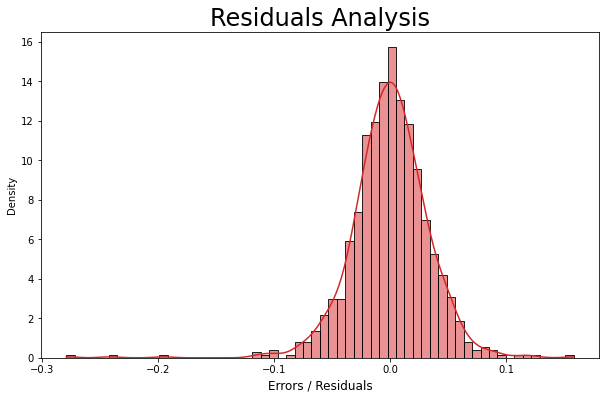

In [103]:
y_train_pred = lr.predict(X_train)
# y_train_pred.head()

# Calculating the residuals
residuals = (y_train - y_train_pred)

# Plot the histogram of the error terms/residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, stat="density", kde=True, color='#d62728')
plt.title('Residuals Analysis', fontsize = 24)                 # Plot heading 
plt.xlabel('Errors / Residuals', fontsize = 12);                    # X-label

- Residuals are left skewed, clearly hinting at the outiers.

((array([-3.20357641, -2.9388231 , -2.79110922, ...,  2.79110922,
          2.9388231 ,  3.20357641]),
  array([-0.27898535, -0.24153813, -0.19510596, ...,  0.11820272,
          0.12222689,  0.15817617])),
 (0.03272104389228336, 8.954732190615373e-06, 0.964950372589446))

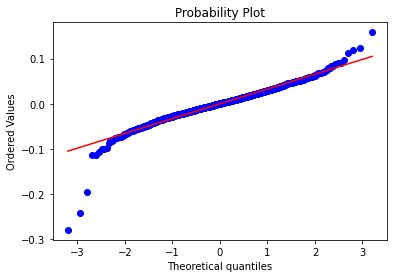

In [104]:
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)

- Errors are NOT NORMALLY DISTRIBUTED.

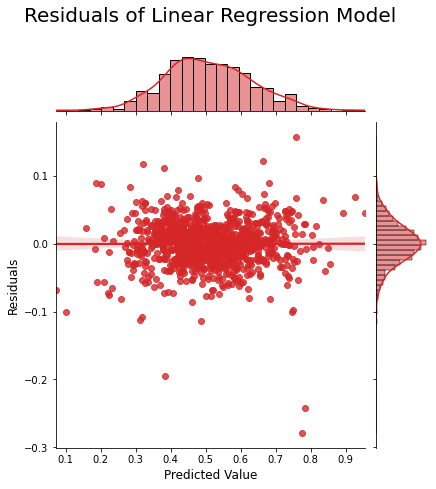

In [105]:
# Visualizing the residuals and predicted value on train set
# plt.figure(figsize=(25,12))
sns.jointplot(x = y_train_pred, y = residuals, kind='reg', color='#d62728')
plt.title('Residuals of Linear Regression Model', fontsize = 20, pad = 100) # Plot heading 
plt.xlabel('Predicted Value', fontsize = 12)                     # X-label
plt.ylabel('Residuals', fontsize = 12);        

In [106]:
y_test_pred = lr.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# R2 scroe on train data
r_squared = r2_score(np.exp(y_train), np.exp(y_train_pred))
r_squared

# R2 scroe on test data
r_squared = r2_score(y_test, y_test_pred)
r_squared

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.9303287385746944

-8.212188765935304e+22

37811932656.084305

### RFE

In [108]:
# Running RFE

# Create the RFE object
rfe = RFE(lr, n_features_to_select = 50)

rfe = rfe.fit(X_train, y_train)

In [109]:
# Features with rfe.support_ values

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 17),
 ('OverallQual', False, 20),
 ('OverallCond', False, 74),
 ('MasVnrArea', False, 114),
 ('ExterQual', False, 137),
 ('ExterCond', False, 138),
 ('BsmtQual', False, 95),
 ('BsmtExposure', False, 115),
 ('BsmtFinType1', False, 124),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 151),
 ('TotalBsmtSF', False, 123),
 ('HeatingQC', False, 147),
 ('1stFlrSF', False, 145),
 ('2ndFlrSF', False, 96),
 ('GrLivArea', True, 1),
 ('KitchenQual', False, 106),
 ('GarageArea', False, 80),
 ('GarageQual', False, 16),
 ('GarageCond', False, 149),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 135),
 ('HouseOrigAgeAtPOS', True, 1),
 ('HouseReModAgeAtPOS', True, 1),
 ('GarageAgeAtPOS', False, 117),
 ('IsReMod', False, 140),
 ('Electrical_SBrkr', False, 129),
 ('IsBsmtHalfBath', False, 98),
 ('IsFullyPavedDrive', False, 139),
 ('CentralAir', True, 1),
 ('MSSubClass_30', False, 52),
 ('MSSubClass_40', False, 28),
 ('MSSubClass_45', False, 31),
 ('MSSubClass_50', False, 10

In [110]:
# Creating a list of rfe supported features
feats = X_train.columns[rfe.support_]
feats

# Creating a list of non-supported rfe features
drop_feats = X_train.columns[~rfe.support_]
drop_feats

Index(['BsmtFinSF1', 'GrLivArea', 'WoodDeckSF', 'HouseOrigAgeAtPOS',
       'HouseReModAgeAtPOS', 'CentralAir', 'MSSubClass_90', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_RRAe',
       'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_2.5Unf',
       'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Foundation_Stone', 'BsmtFullBath_3',
       'BedroomAbvGr_8', 'KitchenAbvGr_1', 'KitchenAbvGr_2', 'TotRmsAbvGrd_3',
       'TotRmsAbvGrd_4', 'TotRmsAbvGrd_5', 'TotRmsAbvGrd_6', 'TotRmsAbvGrd_7',
       'TotRmsAbvGrd_8', 'TotRmsAbvGrd_9', 'TotRmsAbvGrd_10',
       'TotRmsAbvGrd_11', 'TotRmsAbvGrd_12', 'TotRmsAbvGrd_14', 'Fi

Index(['LotFrontage', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=151)

In [111]:
# Creating a dataframe with only important features, ranked by RFE method - Train set
X_train_rfe = X_train[feats]
X_train_rfe.shape

# Creating a dataframe with only important features, ranked by RFE method - Test set
X_test_rfe = X_test[feats]
X_test_rfe.shape

(1021, 50)

(438, 50)

## Ridge Regression

In [112]:
# Importing libraries

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import os

In [113]:
# List of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [114]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004587,0.001621,0.002393,4.883441e-04,0.0001,{'alpha': 0.0001},-0.035841,-0.035418,-0.039939,-0.035958,-0.034552,-0.036341,0.001865,1,-0.033690,-0.031832,-0.031845,-0.033934,-0.033927,-0.033046,0.000989
1,0.003590,0.000489,0.001994,6.641573e-07,0.001,{'alpha': 0.001},-0.035840,-0.035417,-0.039938,-0.035958,-0.034553,-0.036341,0.001865,2,-0.033692,-0.031833,-0.031846,-0.033935,-0.033928,-0.033047,0.000990
2,0.003790,0.000747,0.002393,4.886559e-04,0.01,{'alpha': 0.01},-0.035838,-0.035412,-0.039935,-0.035955,-0.034568,-0.036342,0.001861,3,-0.033704,-0.031844,-0.031850,-0.033948,-0.033940,-0.033057,0.000992
3,0.005784,0.000978,0.003191,7.469139e-04,0.05,{'alpha': 0.05},-0.035829,-0.035393,-0.039924,-0.035946,-0.034633,-0.036345,0.001848,4,-0.033761,-0.031894,-0.031879,-0.034009,-0.033993,-0.033107,0.001001
4,0.005187,0.000747,0.003191,3.993273e-04,0.1,{'alpha': 0.1},-0.035824,-0.035380,-0.039920,-0.035945,-0.034717,-0.036357,0.001833,5,-0.033832,-0.031961,-0.031947,-0.034089,-0.034061,-0.033178,0.001004


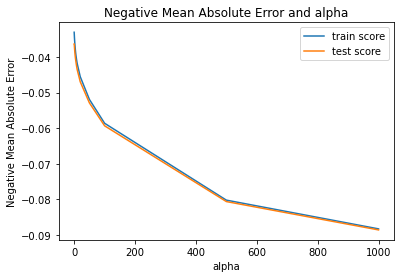

In [115]:
# plotting mean test and train scoes with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show();

In [116]:
print("\n The best estimator across ALL searched params:\n",
          model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_cv.best_params_)


 The best estimator across ALL searched params:
 Ridge(alpha=0.0001)

 The best score across ALL searched params:
 -0.036341385127873015

 The best parameters across ALL searched params:
 {'alpha': 0.0001}


In [117]:
# Using the best hyper parameter in the ridge Regression
alpha = .0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

Ridge(alpha=0.0001)

array([ 0.16250346,  0.57272469,  0.04591524, -0.14778609, -0.05135721,
       -0.04705908, -0.00678131, -0.07742837, -0.07229478,  0.00541727,
        0.15344744,  0.13875413,  0.14940864,  0.13781943,  0.05133027,
        0.07360637,  0.06063248,  0.04646924,  0.08238287,  0.05512493,
       -0.03724737,  0.00541727, -0.00678131,  0.06143539,  0.0865201 ,
       -0.01779721, -0.13250885,  0.05108283, -0.01892541, -0.01779721,
       -0.01892541,  0.0648775 ,  0.04623638, -0.00729   ,  0.019522  ,
       -0.02306992, -0.00452031,  0.00747128,  0.01262993,  0.02720616,
        0.02785153,  0.02984622,  0.02256555,  0.03392635, -0.05670628,
       -0.09298042, -0.00729   , -0.10253255,  0.04725002,  0.06389687])

In [118]:
# predict for the training dataset
y_train_pred = ridge.predict(X_train_rfe)
print('The training accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_train), y_pred=np.exp(y_train_pred)))

The training accuracy is:
0.8557064523123933


In [119]:
# predict for the test dataset
y_test_pred = ridge.predict(X_test_rfe)
print('The testing accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_test), y_pred=np.exp(y_test_pred)))

The testing accuracy is:
0.8221492667691055


In [120]:
# model coefficients
cols = X_test_rfe.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge.coef_)
list(zip(cols, model_parameters))

[('constant', 0.16250345923067208),
 ('BsmtFinSF1', 0.5727246933311156),
 ('GrLivArea', 0.045915241995368325),
 ('WoodDeckSF', -0.14778608973838311),
 ('HouseOrigAgeAtPOS', -0.051357210752371166),
 ('HouseReModAgeAtPOS', -0.04705907714982219),
 ('CentralAir', -0.00678131187901818),
 ('MSSubClass_90', -0.07742836859774696),
 ('MSSubClass_160', -0.07229478453529466),
 ('MSSubClass_180', 0.0054172718918305334),
 ('MSSubClass_190', 0.15344744406337704),
 ('MSZoning_FV', 0.13875413141135698),
 ('MSZoning_RH', 0.14940863795735998),
 ('MSZoning_RL', 0.1378194276766774),
 ('MSZoning_RM', 0.05133027215033286),
 ('Neighborhood_ClearCr', 0.07360636868618571),
 ('Neighborhood_Crawfor', 0.060632480708306506),
 ('Neighborhood_NridgHt', 0.04646924103060176),
 ('Neighborhood_Somerst', 0.08238287180569089),
 ('Neighborhood_StoneBr', 0.05512492962199296),
 ('Neighborhood_Veenker', -0.03724737405798457),
 ('Condition1_RRAe', 0.0054172718929428685),
 ('BldgType_2fmCon', -0.006781311877737332),
 ('BldgType

In [121]:
len(X_test_rfe.columns)

50

_**The no of predictors is same as passed in the model after RFE.**_

## Now, doubling the hyperparameter value for ridge

In [122]:
alpha_double = .0002
ridge_double = Ridge(alpha=alpha_double)

ridge_double.fit(X_train_rfe, y_train)
ridge_double.coef_

Ridge(alpha=0.0002)

array([ 0.16250444,  0.57270321,  0.04591638, -0.14778618, -0.051358  ,
       -0.04705945, -0.00678135, -0.07742768, -0.07229382,  0.00541727,
        0.15343818,  0.13874376,  0.14939962,  0.13781037,  0.05133058,
        0.07360669,  0.06063208,  0.04646933,  0.08238302,  0.05512476,
       -0.03724741,  0.00541727, -0.00678135,  0.06143404,  0.08651538,
       -0.01779591, -0.132501  ,  0.05108336, -0.01892402, -0.01779591,
       -0.01892402,  0.06487693,  0.04623192, -0.00728562,  0.01952357,
       -0.02306913, -0.00452548,  0.00746678,  0.01262643,  0.02720343,
        0.02785002,  0.02984582,  0.0225662 ,  0.03392867, -0.05670218,
       -0.09297407, -0.00728562, -0.10252838,  0.0472505 ,  0.06389536])

In [123]:
# predict on train
y_train_pred_double = ridge_double.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))

0.8634722759100126


In [124]:
rsquare = metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double)
rssbytss = 1-rsquare
rssbytss

0.13652772408998737

In [125]:
# predict on test
y_test_pred = ridge_double.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8155522212273261


In [126]:
# model coefficients
cols = X_test_rfe.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge_double.coef_)
ridge_double_list = list(zip(cols, model_parameters))

In [127]:
ridge_double_list

[('constant', 0.16250443587816082),
 ('BsmtFinSF1', 0.5727032135539906),
 ('GrLivArea', 0.04591638271788007),
 ('WoodDeckSF', -0.14778618450050313),
 ('HouseOrigAgeAtPOS', -0.051357997070215676),
 ('HouseReModAgeAtPOS', -0.047059449444309634),
 ('CentralAir', -0.006781350261278187),
 ('MSSubClass_90', -0.07742768306335054),
 ('MSSubClass_160', -0.0722938201826856),
 ('MSSubClass_180', 0.0054172657606698345),
 ('MSSubClass_190', 0.15343818298478554),
 ('MSZoning_FV', 0.1387437636195794),
 ('MSZoning_RH', 0.14939961913408456),
 ('MSZoning_RL', 0.13781037393981682),
 ('MSZoning_RM', 0.05133057690499733),
 ('Neighborhood_ClearCr', 0.073606691073592),
 ('Neighborhood_Crawfor', 0.06063208299192333),
 ('Neighborhood_NridgHt', 0.04646933474461673),
 ('Neighborhood_Somerst', 0.08238302351385306),
 ('Neighborhood_StoneBr', 0.055124763543777384),
 ('Neighborhood_Veenker', -0.03724740899947781),
 ('Condition1_RRAe', 0.005417265760871177),
 ('BldgType_2fmCon', -0.0067813502631625935),
 ('BldgType_D

## Lasso Regression

In [128]:
# list of alphas to fine tune
params = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01]}


lasso = Lasso()

# cross validation
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
cv_results_lasso = pd.DataFrame(model_lasso_cv.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.044082,0.004821,0.003391,0.000489,1e-07,{'alpha': 1e-07},-0.035840,-0.035417,-0.040020,-0.036061,-0.034552,-0.036378,0.001893,3,-0.033691,-0.031832,-0.031845,-0.033934,-0.033927,-0.033046,0.000990
1,0.036303,0.006574,0.002792,0.000977,1e-06,{'alpha': 1e-06},-0.035836,-0.035412,-0.040007,-0.036058,-0.034554,-0.036374,0.001888,1,-0.033698,-0.031838,-0.031848,-0.033941,-0.033931,-0.033051,0.000990
2,0.018151,0.009780,0.001796,0.000399,1e-05,{'alpha': 1e-05},-0.035804,-0.035380,-0.040089,-0.036024,-0.034583,-0.036376,0.001921,2,-0.033737,-0.031885,-0.031889,-0.034011,-0.033965,-0.033097,0.000993
3,0.009374,0.004829,0.001596,0.000488,0.0001,{'alpha': 0.0001},-0.035443,-0.035235,-0.041283,-0.036437,-0.034913,-0.036662,0.002366,4,-0.034282,-0.032258,-0.032451,-0.034506,-0.034288,-0.033557,0.000987
4,0.003391,0.000489,0.001595,0.000489,0.001,{'alpha': 0.001},-0.038948,-0.040799,-0.043078,-0.043762,-0.042055,-0.041728,0.001712,5,-0.041345,-0.037916,-0.039310,-0.040388,-0.041226,-0.040037,0.001287


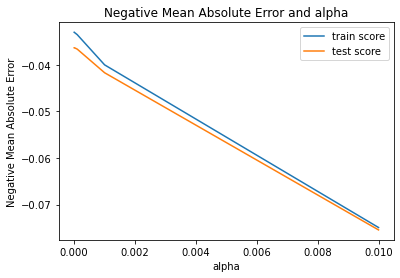

In [130]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show();

In [131]:
print("\n The best estimator across ALL searched params:\n",
          model_lasso_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_lasso_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_lasso_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=1e-06)

 The best score across ALL searched params:
 -0.036373661528107636

 The best parameters across ALL searched params:
 {'alpha': 1e-06}


#### Fitting Lasso

In [132]:
alpha_lasso =0.000001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=1e-06)

In [133]:
lasso.coef_

array([ 1.62412758e-01,  5.72387937e-01,  4.59378484e-02, -1.47773029e-01,
       -5.13920095e-02, -4.70730855e-02, -1.34609231e-02, -7.73821715e-02,
       -7.21570206e-02,  3.31102046e-05,  1.52782215e-01,  1.37951016e-01,
        1.48772370e-01,  1.37173088e-01,  5.13001285e-02,  7.35886294e-02,
        6.06023831e-02,  4.64561795e-02,  8.22995902e-02,  5.50462916e-02,
       -3.71619852e-02,  1.07605234e-02, -7.84017738e-06,  6.12363225e-02,
        8.59175512e-02, -3.45363925e-02, -1.31989254e-01,  5.10786924e-02,
       -3.68079165e-02, -4.47360947e-05, -4.38589138e-08,  6.46558415e-02,
        4.51245151e-02, -3.36448811e-02,  1.94799067e-02, -2.31830948e-02,
       -2.49943533e-02, -1.30397718e-02, -7.84805016e-03,  6.71824465e-03,
        7.38904763e-03,  9.38916310e-03,  2.12481654e-03,  1.35146184e-02,
       -7.69563760e-02, -1.13121577e-01, -0.00000000e+00, -1.02301582e-01,
        4.72613264e-02,  6.36933944e-02])

In [134]:
# model coefficients

model_parameters = list(lasso.coef_)
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))
lasso_list

[('constant', 0.16241275781092682),
 ('BsmtFinSF1', 0.572387937172552),
 ('GrLivArea', 0.045937848365163965),
 ('WoodDeckSF', -0.14777302866691736),
 ('HouseOrigAgeAtPOS', -0.051392009453743455),
 ('HouseReModAgeAtPOS', -0.04707308550287798),
 ('CentralAir', -0.01346092310051967),
 ('MSSubClass_90', -0.07738217148707319),
 ('MSSubClass_160', -0.07215702058918072),
 ('MSSubClass_180', 3.3110204611522644e-05),
 ('MSSubClass_190', 0.15278221469013106),
 ('MSZoning_FV', 0.13795101611914617),
 ('MSZoning_RH', 0.14877237019456171),
 ('MSZoning_RL', 0.13717308849587273),
 ('MSZoning_RM', 0.05130012850157534),
 ('Neighborhood_ClearCr', 0.07358862936139285),
 ('Neighborhood_Crawfor', 0.060602383057847466),
 ('Neighborhood_NridgHt', 0.04645617948271457),
 ('Neighborhood_Somerst', 0.08229959017897397),
 ('Neighborhood_StoneBr', 0.05504629160744812),
 ('Neighborhood_Veenker', -0.03716198518278998),
 ('Condition1_RRAe', 0.01076052337355975),
 ('BldgType_2fmCon', -7.840177383505351e-06),
 ('BldgType

In [135]:
#List of all predictors with non zero co-efficients
c=0
for i,j in enumerate(lasso_list):
    if(lasso_list[i][1]!=0):
        print(lasso_list[i])
        c+=1

print('\n')        
print('Total predictors used in Lasso ', c) 

('constant', 0.16241275781092682)
('BsmtFinSF1', 0.572387937172552)
('GrLivArea', 0.045937848365163965)
('WoodDeckSF', -0.14777302866691736)
('HouseOrigAgeAtPOS', -0.051392009453743455)
('HouseReModAgeAtPOS', -0.04707308550287798)
('CentralAir', -0.01346092310051967)
('MSSubClass_90', -0.07738217148707319)
('MSSubClass_160', -0.07215702058918072)
('MSSubClass_180', 3.3110204611522644e-05)
('MSSubClass_190', 0.15278221469013106)
('MSZoning_FV', 0.13795101611914617)
('MSZoning_RH', 0.14877237019456171)
('MSZoning_RL', 0.13717308849587273)
('MSZoning_RM', 0.05130012850157534)
('Neighborhood_ClearCr', 0.07358862936139285)
('Neighborhood_Crawfor', 0.060602383057847466)
('Neighborhood_NridgHt', 0.04645617948271457)
('Neighborhood_Somerst', 0.08229959017897397)
('Neighborhood_StoneBr', 0.05504629160744812)
('Neighborhood_Veenker', -0.03716198518278998)
('Condition1_RRAe', 0.01076052337355975)
('BldgType_2fmCon', -7.840177383505351e-06)
('BldgType_Duplex', 0.061236322462601266)
('HouseStyle_2.

In [136]:
lm = Lasso(alpha=0.000001)
lm.fit(X_train_rfe, y_train)

# predict
y_train_pred = lm.predict(X_train_rfe)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Lasso(alpha=1e-06)

The training accuracy is:
0.8634716294421072
The test accuracy is:
0.8145652922124978


### Now, doubling the alpha for Lasso

In [137]:
lm = Lasso(alpha=0.000002)
lm.fit(X_train_rfe, y_train)

# predict
y_train_pred = lm.predict(X_train_rfe)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Lasso(alpha=2e-06)

The training accuracy is:
0.8634696885625848
The test accuracy is:
0.8147438831302238


In [138]:
# model coefficients

model_parameters = list(lasso.coef_)
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))
lasso_list

[('constant', 0.16241275781092682),
 ('BsmtFinSF1', 0.572387937172552),
 ('GrLivArea', 0.045937848365163965),
 ('WoodDeckSF', -0.14777302866691736),
 ('HouseOrigAgeAtPOS', -0.051392009453743455),
 ('HouseReModAgeAtPOS', -0.04707308550287798),
 ('CentralAir', -0.01346092310051967),
 ('MSSubClass_90', -0.07738217148707319),
 ('MSSubClass_160', -0.07215702058918072),
 ('MSSubClass_180', 3.3110204611522644e-05),
 ('MSSubClass_190', 0.15278221469013106),
 ('MSZoning_FV', 0.13795101611914617),
 ('MSZoning_RH', 0.14877237019456171),
 ('MSZoning_RL', 0.13717308849587273),
 ('MSZoning_RM', 0.05130012850157534),
 ('Neighborhood_ClearCr', 0.07358862936139285),
 ('Neighborhood_Crawfor', 0.060602383057847466),
 ('Neighborhood_NridgHt', 0.04645617948271457),
 ('Neighborhood_Somerst', 0.08229959017897397),
 ('Neighborhood_StoneBr', 0.05504629160744812),
 ('Neighborhood_Veenker', -0.03716198518278998),
 ('Condition1_RRAe', 0.01076052337355975),
 ('BldgType_2fmCon', -7.840177383505351e-06),
 ('BldgType

In [139]:
#List of all predictors with non zero co-efficients
c=0
for i,j in enumerate(lasso_list):
    if(lasso_list[i][1]!=0):
        print(lasso_list[i])
        c+=1

print('\n')        
print('Total predictors used in Lasso ', c) 

('constant', 0.16241275781092682)
('BsmtFinSF1', 0.572387937172552)
('GrLivArea', 0.045937848365163965)
('WoodDeckSF', -0.14777302866691736)
('HouseOrigAgeAtPOS', -0.051392009453743455)
('HouseReModAgeAtPOS', -0.04707308550287798)
('CentralAir', -0.01346092310051967)
('MSSubClass_90', -0.07738217148707319)
('MSSubClass_160', -0.07215702058918072)
('MSSubClass_180', 3.3110204611522644e-05)
('MSSubClass_190', 0.15278221469013106)
('MSZoning_FV', 0.13795101611914617)
('MSZoning_RH', 0.14877237019456171)
('MSZoning_RL', 0.13717308849587273)
('MSZoning_RM', 0.05130012850157534)
('Neighborhood_ClearCr', 0.07358862936139285)
('Neighborhood_Crawfor', 0.060602383057847466)
('Neighborhood_NridgHt', 0.04645617948271457)
('Neighborhood_Somerst', 0.08229959017897397)
('Neighborhood_StoneBr', 0.05504629160744812)
('Neighborhood_Veenker', -0.03716198518278998)
('Condition1_RRAe', 0.01076052337355975)
('BldgType_2fmCon', -7.840177383505351e-06)
('BldgType_Duplex', 0.061236322462601266)
('HouseStyle_2.

### Removal of Top 5 predictors from Lasso

In [140]:
top5 = pd.DataFrame(lasso_list)
top5.columns = ['Variable', 'Coeff']
# Sorting the coefficients in ascending order
top5 = top5.drop(index=0,axis=0).sort_values((['Coeff']), axis = 0, ascending = False)
# top5
top5.head(5)

,Variable,Coeff
1,BsmtFinSF1,0.572388
10,MSSubClass_190,0.152782
12,MSZoning_RH,0.148772
11,MSZoning_FV,0.137951
13,MSZoning_RL,0.137173


In [141]:
top5_list = list(top5.head(5)['Variable'])
#type(top5_list)
top5_list

['BsmtFinSF1', 'MSSubClass_190', 'MSZoning_RH', 'MSZoning_FV', 'MSZoning_RL']

In [142]:
X_train_rfe2 = X_train_rfe.drop(columns=top5_list)

In [143]:
X_test_rfe2 = X_test_rfe.drop(columns=top5_list)

In [144]:
model_lasso_cv.fit(X_train_rfe2, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [145]:
cv_results_lasso = pd.DataFrame(model_lasso_cv.cv_results_)

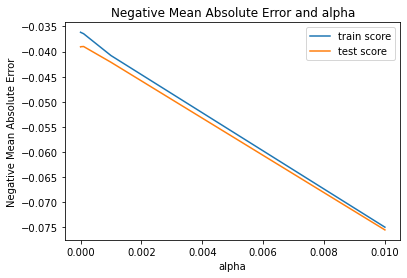

In [146]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show();

In [147]:
print("\n The best estimator across ALL searched params:\n",
          model_lasso_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_lasso_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_lasso_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.0001)

 The best score across ALL searched params:
 -0.038989266557855354

 The best parameters across ALL searched params:
 {'alpha': 0.0001}


In [148]:
alpha_lasso =0.0001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_rfe2, y_train)

Lasso(alpha=0.0001)

In [149]:
# model coefficients

model_parameters = list(lasso.coef_)
cols = X_train_rfe2.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))
lasso_list

[('constant', 0.5920251991870706),
 ('GrLivArea', 0.05278039945729338),
 ('WoodDeckSF', -0.16177041489084015),
 ('HouseOrigAgeAtPOS', -0.05095074515143524),
 ('HouseReModAgeAtPOS', -0.05901591182447062),
 ('CentralAir', -0.0),
 ('MSSubClass_90', -0.0784986875514709),
 ('MSSubClass_160', -0.06356401308870559),
 ('MSSubClass_180', -0.009746717249804719),
 ('MSZoning_RM', 0.05079762372256491),
 ('Neighborhood_ClearCr', 0.07694604940084745),
 ('Neighborhood_Crawfor', 0.059993943478198995),
 ('Neighborhood_NridgHt', 0.0427072728517513),
 ('Neighborhood_Somerst', 0.07589836170379251),
 ('Neighborhood_StoneBr', 0.054349707506303566),
 ('Neighborhood_Veenker', -0.02391706051400104),
 ('Condition1_RRAe', 0.017799305798861565),
 ('BldgType_2fmCon', -0.0),
 ('BldgType_Duplex', 0.033221200368704254),
 ('HouseStyle_2.5Unf', 0.03159109036515528),
 ('RoofStyle_Shed', -0.0),
 ('Exterior1st_AsphShn', -0.08474954810071558),
 ('Exterior1st_BrkComm', 0.05330213274471218),
 ('Exterior1st_BrkFace', -0.0),
 

In [150]:
#List of all predictors with non zero co-efficients
c=0
for i,j in enumerate(lasso_list):
    if(lasso_list[i][1]!=0):
        print(lasso_list[i])
        c+=1

print('\n')        
print('Total predictors used in Lasso ', c) 

('constant', 0.5920251991870706)
('GrLivArea', 0.05278039945729338)
('WoodDeckSF', -0.16177041489084015)
('HouseOrigAgeAtPOS', -0.05095074515143524)
('HouseReModAgeAtPOS', -0.05901591182447062)
('MSSubClass_90', -0.0784986875514709)
('MSSubClass_160', -0.06356401308870559)
('MSSubClass_180', -0.009746717249804719)
('MSZoning_RM', 0.05079762372256491)
('Neighborhood_ClearCr', 0.07694604940084745)
('Neighborhood_Crawfor', 0.059993943478198995)
('Neighborhood_NridgHt', 0.0427072728517513)
('Neighborhood_Somerst', 0.07589836170379251)
('Neighborhood_StoneBr', 0.054349707506303566)
('Neighborhood_Veenker', -0.02391706051400104)
('Condition1_RRAe', 0.017799305798861565)
('BldgType_Duplex', 0.033221200368704254)
('HouseStyle_2.5Unf', 0.03159109036515528)
('Exterior1st_AsphShn', -0.08474954810071558)
('Exterior1st_BrkComm', 0.05330213274471218)
('Exterior2nd_CBlock', 0.037541759221640075)
('KitchenAbvGr_1', -0.053224682141128306)
('KitchenAbvGr_2', -0.011407584392098918)
('TotRmsAbvGrd_3', -0.

In [151]:
top5 = pd.DataFrame(lasso_list)
top5.columns = ['Variable', 'Coeff']
# Sorting the coefficients in ascending order
top5 = top5.drop(index=0,axis=0).sort_values((['Coeff']), axis = 0, ascending = False)
# top5
top5.head(5)

,Variable,Coeff
10,Neighborhood_ClearCr,0.076946
13,Neighborhood_Somerst,0.075898
11,Neighborhood_Crawfor,0.059994
14,Neighborhood_StoneBr,0.054350
22,Exterior1st_BrkComm,0.053302


In [152]:
top5_list = list(top5.head(5)['Variable'])
#type(top5_list)
top5_list

['Neighborhood_ClearCr',
 'Neighborhood_Somerst',
 'Neighborhood_Crawfor',
 'Neighborhood_StoneBr',
 'Exterior1st_BrkComm']

In [153]:
lm = Lasso(alpha=0.0001)
lm.fit(X_train_rfe2, y_train)

# predict
y_train_pred = lm.predict(X_train_rfe2)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe2)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Lasso(alpha=0.0001)

The training accuracy is:
0.8450878714148785
The test accuracy is:
0.7894474384908658


#### Total predictors used in Lasso  33